# Global Power Plant Database

In [1]:
import warnings
warnings.filterwarnings ('ignore')

### Import Data from Website

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# 

### EDA

In [5]:
df.shape

(907, 27)

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

##### Dropping columns that have only single values or irrelevent data

In [8]:
df.drop(['country','country_long','name','gppd_idnr','latitude','longitude','other_fuel2','other_fuel3','commissioning_year','owner','source','url','geolocation_source','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','generation_data_source','estimated_generation_gwh'], axis=1,inplace=True)

In [9]:
df.head()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [10]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'other_fuel1', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [11]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
other_fuel1            709
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [12]:
df.nunique()

capacity_mw            361
primary_fuel             8
other_fuel1              3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

In [13]:
df.dtypes

capacity_mw            float64
primary_fuel            object
other_fuel1             object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

# 

### Analysing with Null values

In [14]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
other_fuel1            709
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

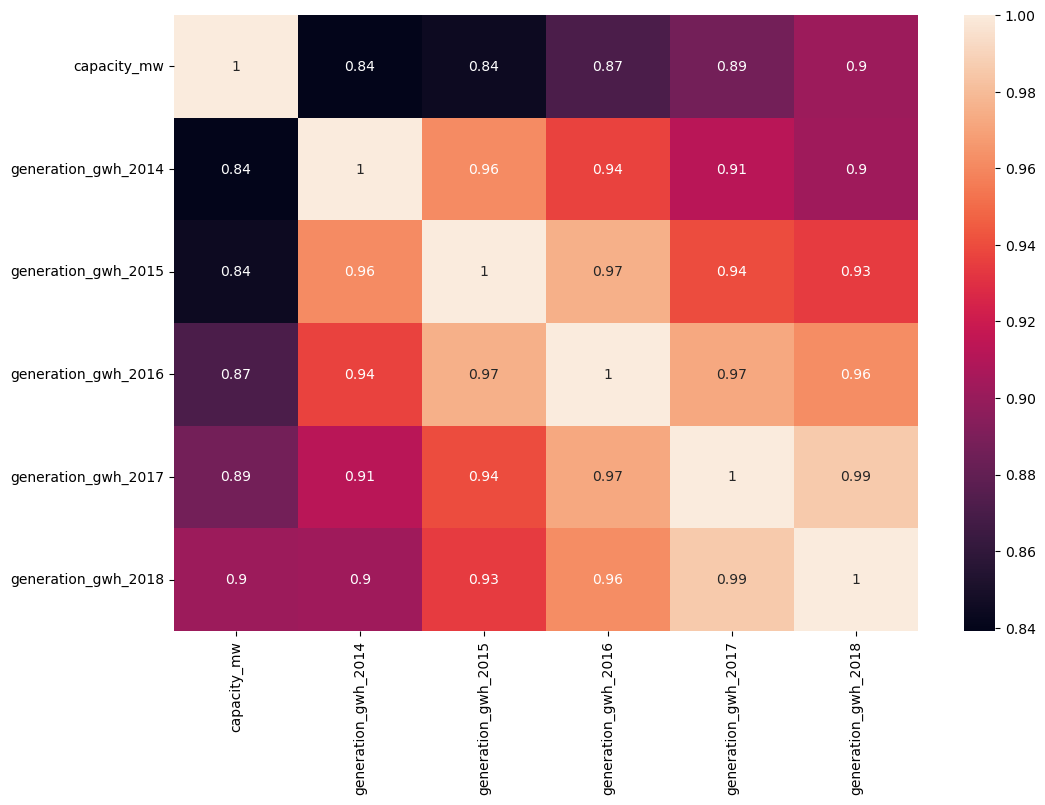

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr().abs ()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

### Imputation of Continuous data

In [16]:
from sklearn.impute import KNNImputer

knnimp = KNNImputer(n_neighbors=2)
knn_imp = pd.DataFrame (knnimp.fit_transform(df[['capacity_mw','generation_gwh_2018']]))

df[['capacity_mw','generation_gwh_2018']] = knnimp.transform(df[['capacity_mw','generation_gwh_2018']])

In [17]:
knnimp = KNNImputer(n_neighbors=2)
knn_imp = pd.DataFrame (knnimp.fit_transform(df[['generation_gwh_2018','generation_gwh_2017']]))

df[['generation_gwh_2018','generation_gwh_2017']] = knnimp.transform(df[['generation_gwh_2018','generation_gwh_2017']])

In [18]:
knnimp = KNNImputer(n_neighbors=2)
knn_imp = pd.DataFrame (knnimp.fit_transform(df[['generation_gwh_2017','generation_gwh_2016']]))

df[['generation_gwh_2017','generation_gwh_2016']] = knnimp.transform(df[['generation_gwh_2017','generation_gwh_2016']])

In [19]:
knnimp = KNNImputer(n_neighbors=2)
knn_imp = pd.DataFrame (knnimp.fit_transform(df[['generation_gwh_2016','generation_gwh_2015']]))

df[['generation_gwh_2016','generation_gwh_2015']] = knnimp.transform(df[['generation_gwh_2016','generation_gwh_2015']])

In [20]:
knnimp = KNNImputer(n_neighbors=2)
knn_imp = pd.DataFrame (knnimp.fit_transform(df[['generation_gwh_2015','generation_gwh_2014']]))

df[['generation_gwh_2015','generation_gwh_2014']] = knnimp.transform(df[['generation_gwh_2015','generation_gwh_2014']])

# 

### Removing Null values from Categorical data

In [21]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
other_fuel1            709
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [22]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [23]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [24]:
df = df.drop(['other_fuel1'], axis=1)

In [25]:
df.head()

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,334.245375,221.845200,153.006125,260.299000,27.466975
1,98.0,Coal,157.927964,213.278250,162.720150,241.620825,237.819925
2,39.2,Wind,157.468700,162.155087,240.048500,165.978200,181.726800
3,135.0,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# 

### Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df.primary_fuel = le.fit_transform(df.primary_fuel)
df.head()

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,6,334.245375,221.845200,153.006125,260.299000,27.466975
1,98.0,1,157.927964,213.278250,162.720150,241.620825,237.819925
2,39.2,7,157.468700,162.155087,240.048500,165.978200,181.726800
3,135.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# 

### Removing Outliners

In [28]:
df.describe()

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,3.206174,1265.182327,1271.793162,1283.378472,1375.290907,1340.706660
std,590.085456,2.280652,2873.796176,3072.787367,3104.449113,3147.316774,3291.615057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,1.000000,248.998750,214.327975,153.006125,235.551325,27.466975
50%,59.200000,3.000000,334.245375,221.845200,153.006125,260.299000,126.589500
75%,385.250000,6.000000,792.343325,689.135438,726.887300,817.977250,837.129594
max,4760.000000,7.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


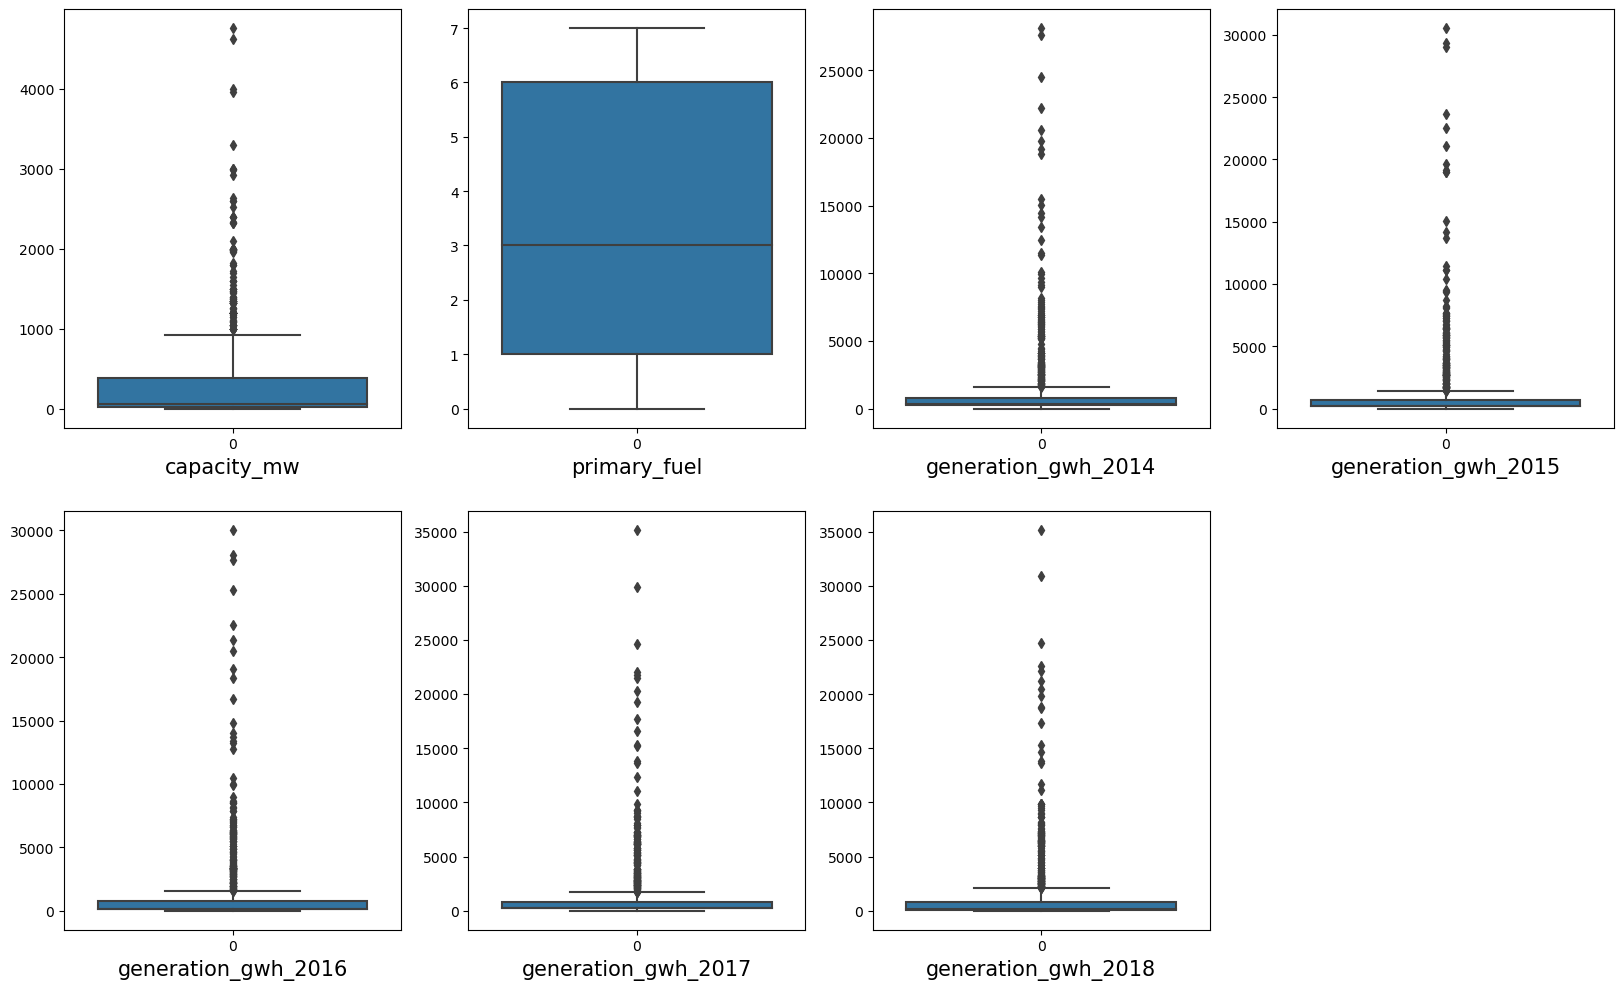

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

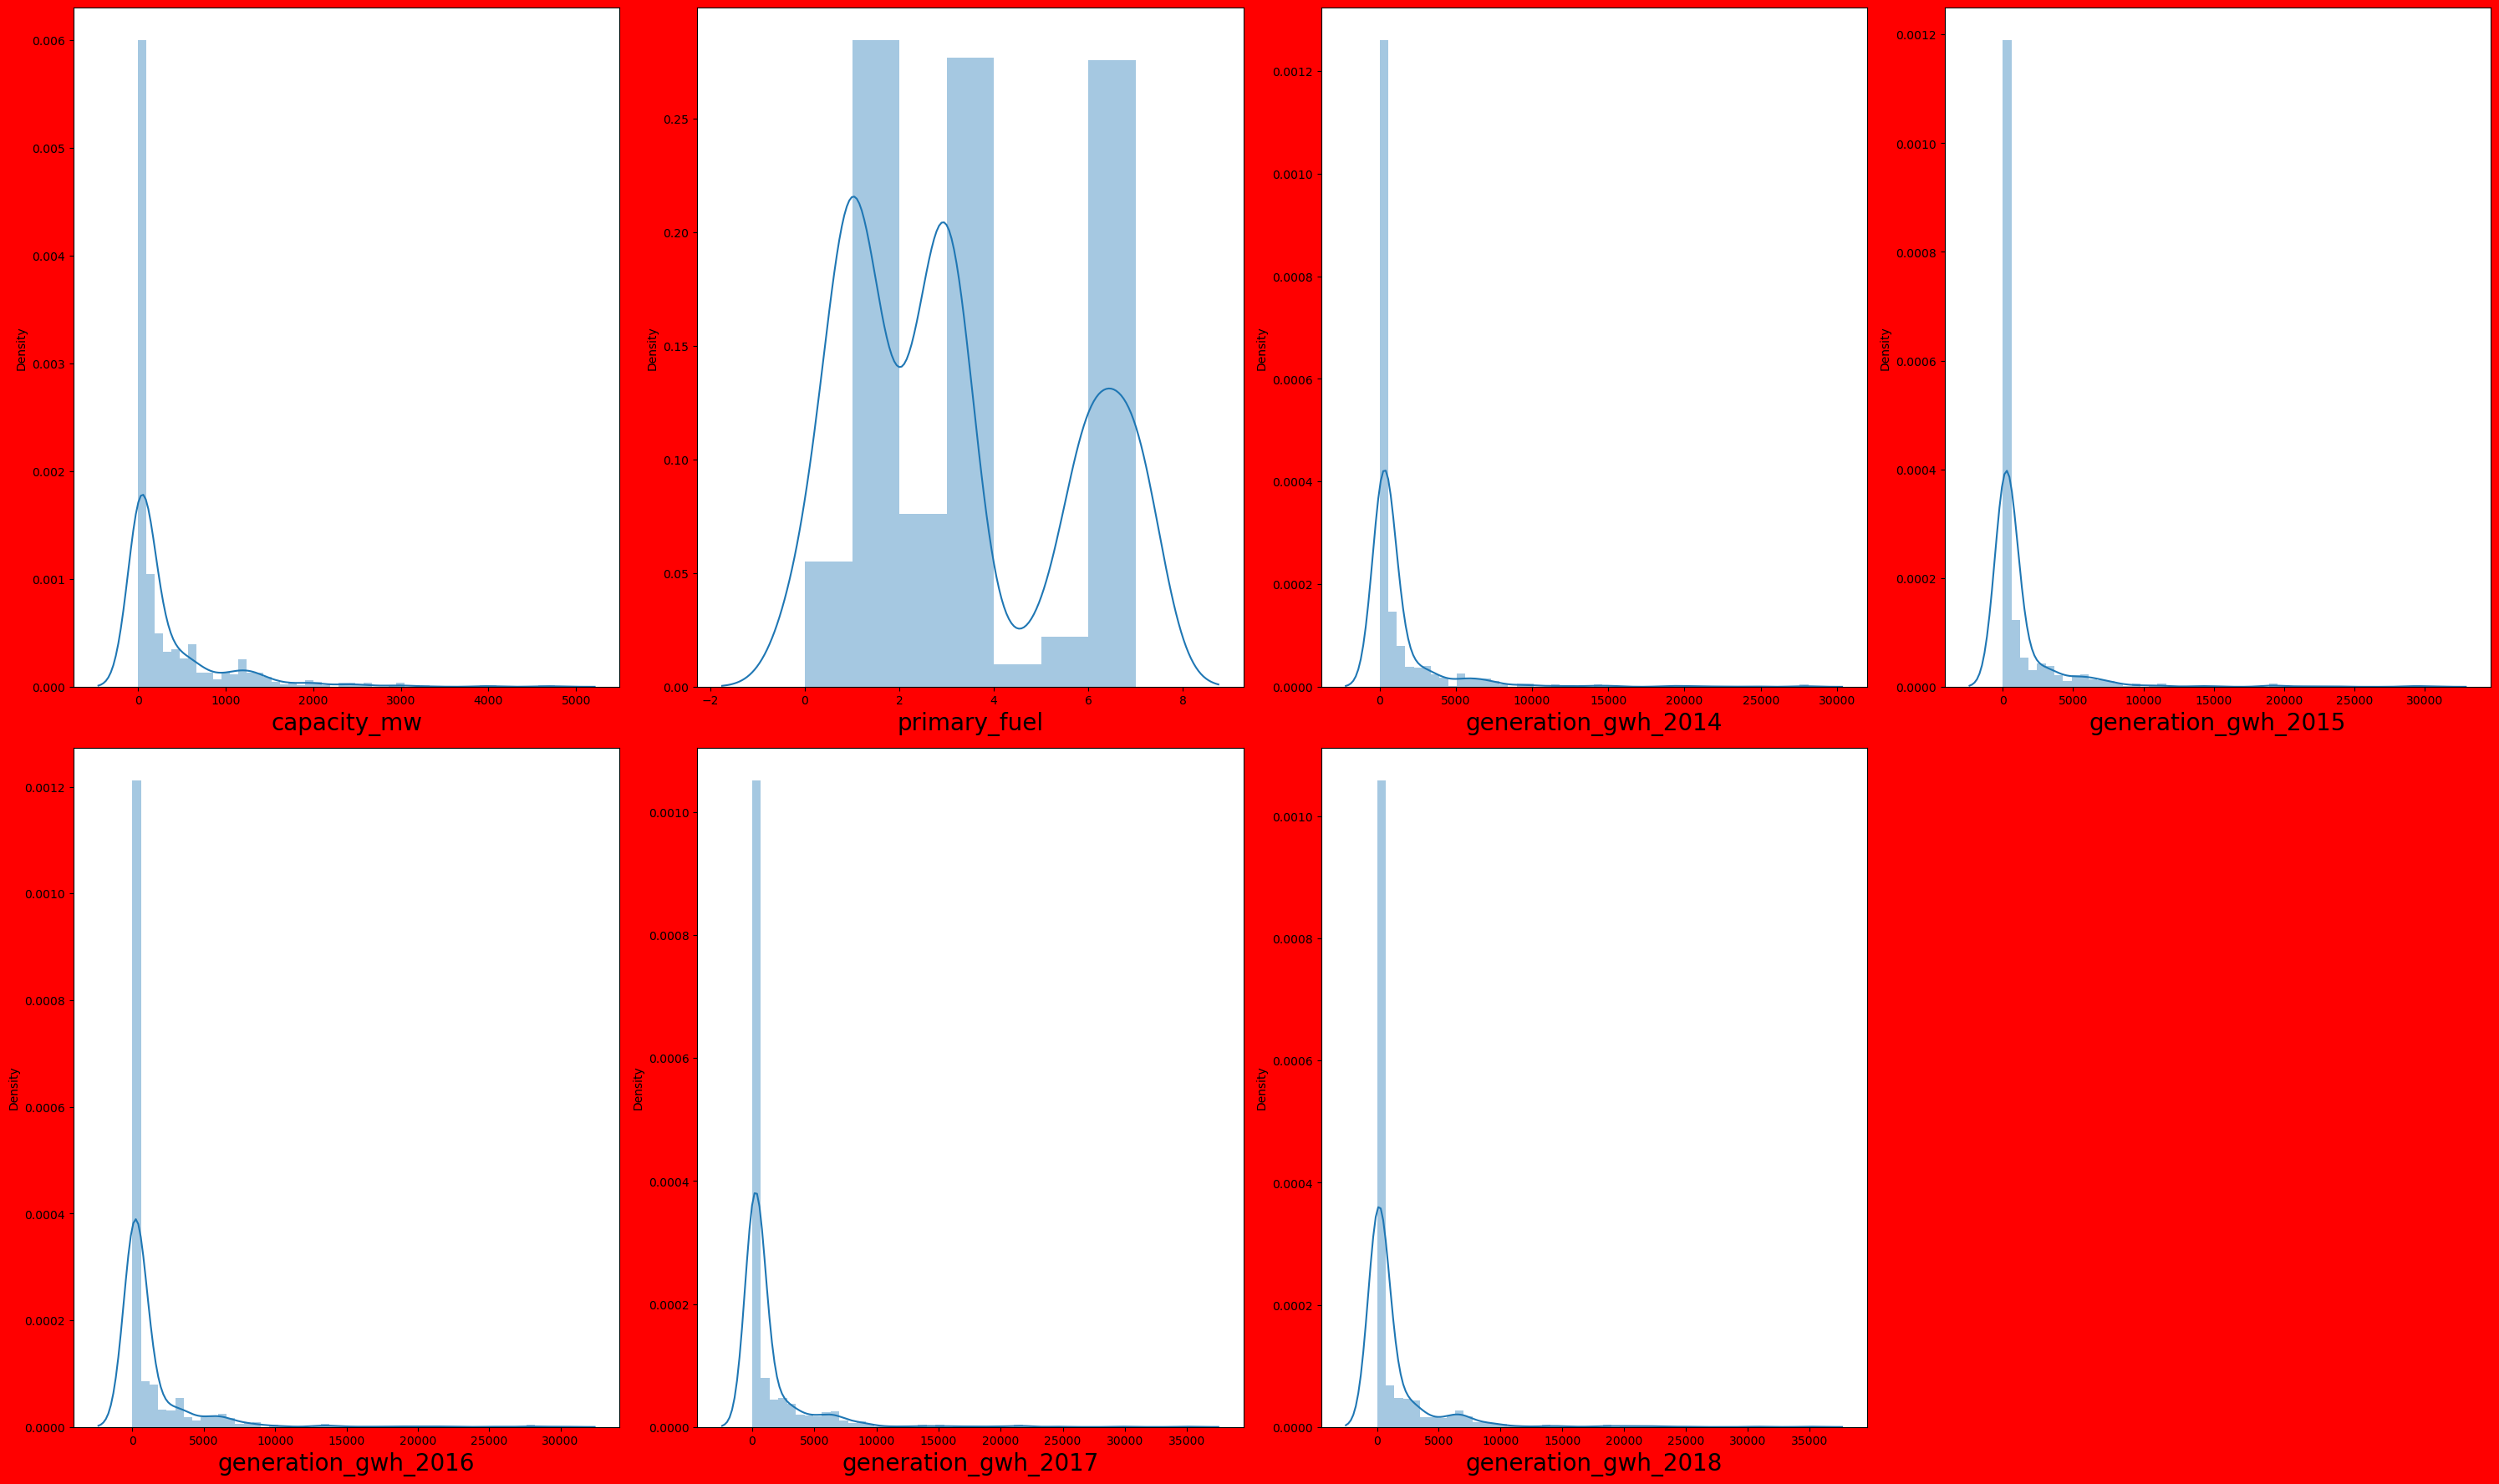

In [30]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [31]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [32]:
from scipy.stats import zscore 

z_score = zscore (df[['capacity_mw','generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.8).all(axis=1)
df = df[filtering_entry]

df.describe()

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,246.991947,3.273973,910.102246,887.118259,874.499619,947.694014,880.937682
std,390.901178,2.285419,1548.906831,1598.065478,1641.175721,1670.770882,1747.510796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,241.990187,213.278250,153.006125,235.323719,27.466975
50%,50.400000,3.000000,334.245375,221.845200,153.006125,260.299000,100.485050
75%,300.000000,6.000000,674.432225,619.234175,554.426438,555.222675,599.994950
max,1967.080000,7.000000,9155.180000,8691.857000,8952.470000,9271.610000,9334.000000


In [33]:
df.shape

(876, 7)

# 

### Removing Skewness

In [34]:
df.skew()

capacity_mw            1.996244
primary_fuel           0.425447
generation_gwh_2014    2.884836
generation_gwh_2015    2.699365
generation_gwh_2016    2.689015
generation_gwh_2017    2.663507
generation_gwh_2018    2.617324
dtype: float64

In [35]:
df['capacity_mw'] = np.log1p(df['capacity_mw'])
df['generation_gwh_2014'] = np.log1p(df['generation_gwh_2014'])
df['generation_gwh_2015'] = np.log1p(df['generation_gwh_2015'])
df['generation_gwh_2016'] = np.log1p(df['generation_gwh_2016'])
df['generation_gwh_2017'] = np.log1p(df['generation_gwh_2017'])
df['generation_gwh_2018'] = np.log1p(df['generation_gwh_2018'])

In [36]:
df.skew()

capacity_mw            0.095615
primary_fuel           0.425447
generation_gwh_2014   -1.306203
generation_gwh_2015   -0.944568
generation_gwh_2016   -0.656245
generation_gwh_2017   -1.064652
generation_gwh_2018    0.015595
dtype: float64

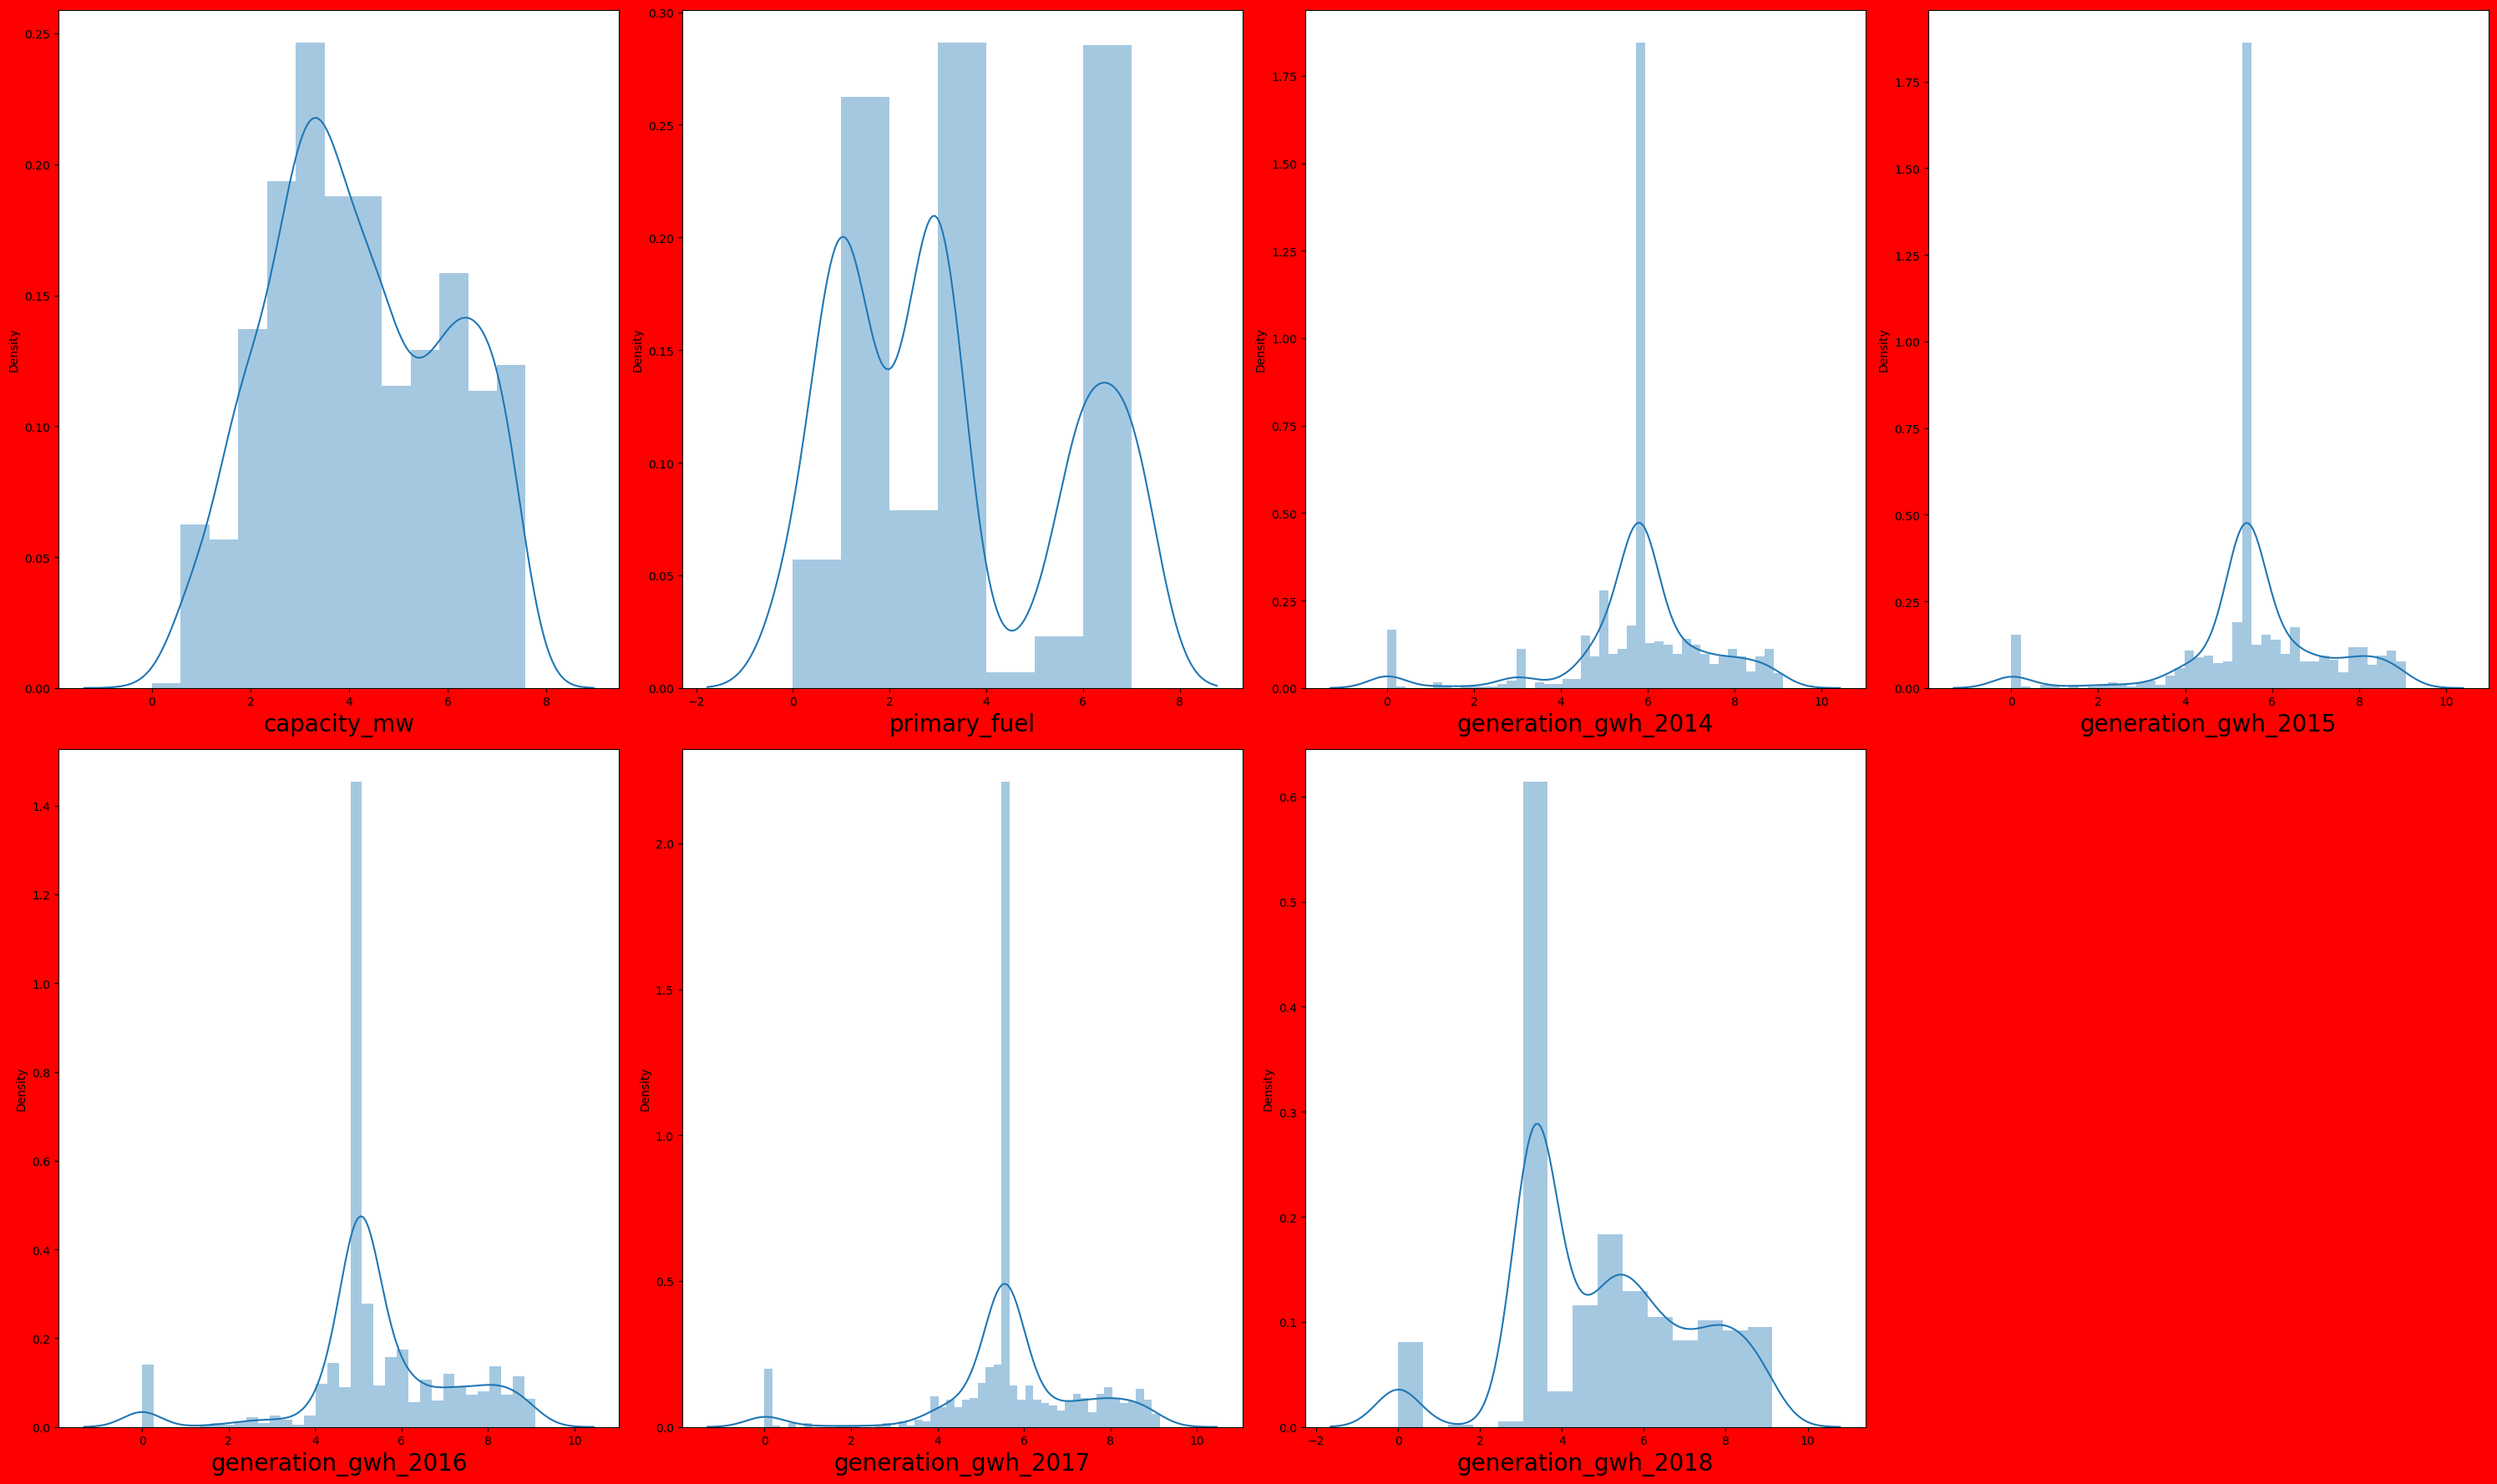

In [37]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout() 

# 

### Removing Multi-colinearity

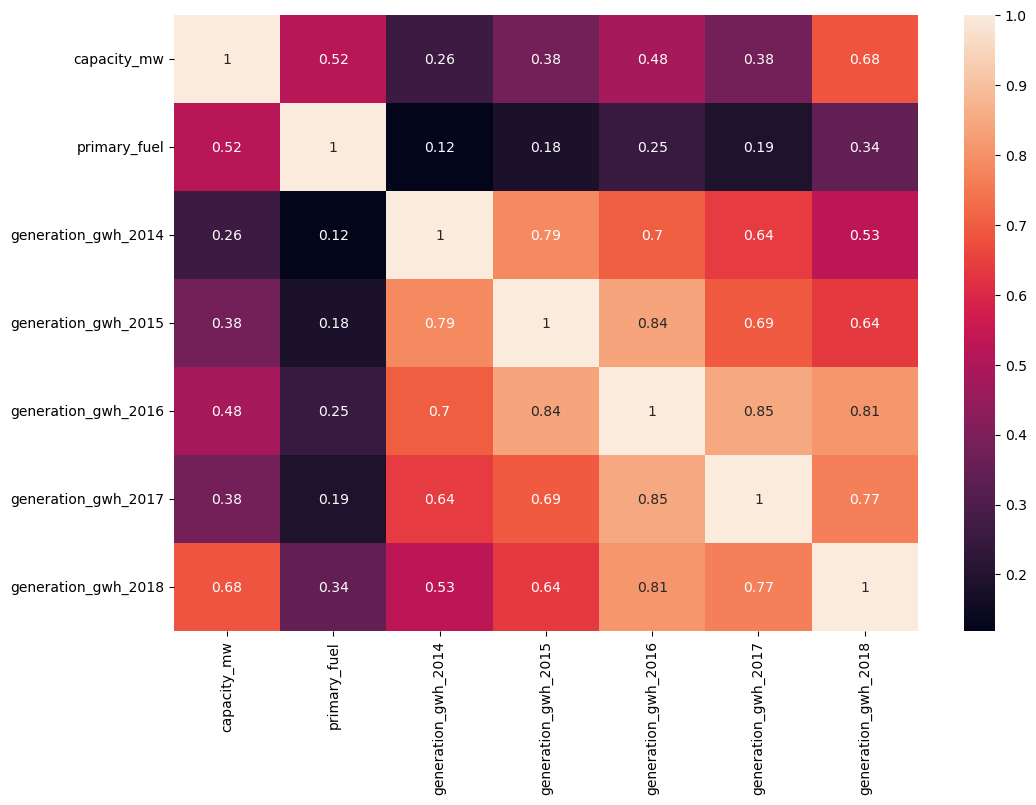

In [38]:
df_corr = df.corr().abs ()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

In [39]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [40]:
df = df.drop(['generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'], axis=1)

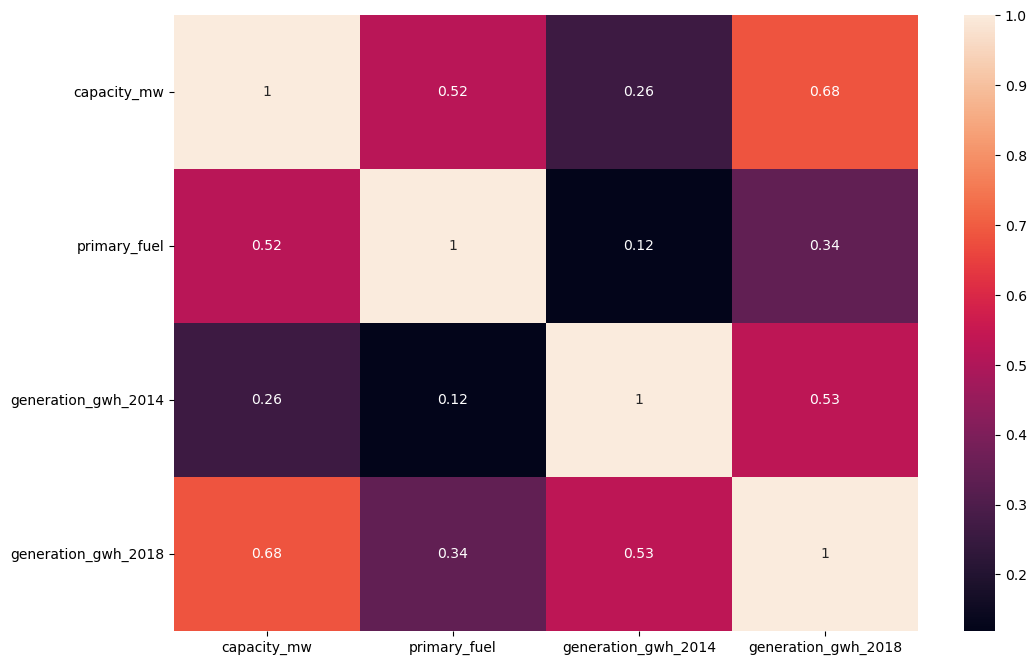

In [41]:
df_corr = df.corr().abs ()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

# 

## For Classification, Target=primary_fuel, Features=Rest

### Oversampling

In [42]:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
upsample = SMOTE()

In [45]:
x, y = upsample.fit_resample(x,y)

In [46]:
from collections import Counter
count = Counter(y)
print(count)

Counter({6: 251, 1: 251, 7: 251, 2: 251, 3: 251, 0: 251, 5: 251, 4: 251})


# 

### Standardization

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

### Train-Test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

### Importing important Metrices

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [53]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [54]:
cls_reg.coef_

array([[-1.18490409,  0.38683938, -1.04979684],
       [ 1.82062738, -0.34908074,  0.15153405],
       [ 2.09444687, -0.3001764 , -0.5338638 ],
       [-0.10839334, -0.20393102,  0.65129149],
       [ 2.68651866, -0.1206456 , -0.34745826],
       [ 0.26961436, -0.17268758, -1.73833299],
       [-3.52216612,  1.00270998,  1.67504512],
       [-2.05574372, -0.24302803,  1.19158122]])

In [55]:
cls_reg.intercept_

array([ 0.0831548 ,  0.22986431,  0.34432344,  0.70671547, -0.31871446,
        0.08461625, -1.17645287,  0.04649306])

In [56]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.4163346613545817


In [57]:
y_pred = cls_reg.predict(x_test)

In [58]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.3884462151394422


In [59]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[42,  0,  0,  1,  0,  0,  6,  6],
       [ 2,  9,  4,  7, 21,  5,  1,  6],
       [ 4, 11,  9,  9, 15, 12,  0,  2],
       [10, 17,  3, 15,  6,  1, 12,  7],
       [ 0,  3, 13,  0, 34,  8,  0,  0],
       [18,  0,  0, 12,  0, 37,  0,  2],
       [12,  0,  0, 10,  0,  0, 39,  1],
       [27,  1,  0, 20,  0,  0, 12, 10]], dtype=int64)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.37      0.76      0.49        55
           1       0.22      0.16      0.19        55
           2       0.31      0.15      0.20        62
           3       0.20      0.21      0.21        71
           4       0.45      0.59      0.51        58
           5       0.59      0.54      0.56        69
           6       0.56      0.63      0.59        62
           7       0.29      0.14      0.19        70

    accuracy                           0.39       502
   macro avg       0.37      0.40      0.37       502
weighted avg       0.37      0.39      0.36       502



### Cross-validation

In [61]:
from sklearn.model_selection import KFold, cross_val_score

In [62]:
cross_val_score (cls_reg, x_train, y_train, cv=5)

array([0.41059603, 0.41196013, 0.3986711 , 0.42192691, 0.41528239])

In [63]:
cross_val_score (cls_reg, x_train, y_train, cv=5).mean()

0.4116873116103056

In [64]:
cross_val_score (cls_reg, x_test, y_test, cv=5)

array([0.44554455, 0.37623762, 0.26      , 0.38      , 0.5       ])

In [65]:
cross_val_score (cls_reg, x_test, y_test, cv=5).mean()

0.39235643564356437

# 

### Applying BaggingClassifier to LogisticRegression

In [66]:
from sklearn.ensemble import BaggingClassifier

In [67]:
bag0 = BaggingClassifier(LogisticRegression())

In [68]:
bag0.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [69]:
print('Accuracy Score:',bag0.score(x_train, y_train))

Accuracy Score: 0.41832669322709165


In [70]:
y_pred = bag0.predict(x_test)

In [71]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.39243027888446214


In [72]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[42,  0,  0,  0,  0,  0,  6,  7],
       [ 2,  7,  3,  7, 24,  5,  1,  6],
       [ 4,  9,  8,  8, 17, 13,  0,  3],
       [ 9, 18,  2, 15,  6,  1, 12,  8],
       [ 0,  2, 10,  0, 38,  8,  0,  0],
       [18,  0,  0, 11,  0, 37,  0,  3],
       [12,  0,  0, 10,  0,  0, 39,  1],
       [23,  1,  0, 19,  0,  0, 16, 11]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.76      0.51        55
           1       0.19      0.13      0.15        55
           2       0.35      0.13      0.19        62
           3       0.21      0.21      0.21        71
           4       0.45      0.66      0.53        58
           5       0.58      0.54      0.56        69
           6       0.53      0.63      0.57        62
           7       0.28      0.16      0.20        70

    accuracy                           0.39       502
   macro avg       0.37      0.40      0.37       502
weighted avg       0.37      0.39      0.36       502



### Cross-validation

In [74]:
from sklearn.model_selection import KFold, cross_val_score

In [75]:
cross_val_score (bag0, x_train, y_train, cv=5)

array([0.3807947 , 0.41196013, 0.42192691, 0.41196013, 0.41860465])

In [76]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.4077028008184639

In [77]:
cross_val_score (bag0, x_test, y_test, cv=5)

array([0.44554455, 0.36633663, 0.25      , 0.39      , 0.52      ])

In [78]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.40571384567996305

# 

### DecisionTreeClassifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'best'}

In [88]:
cls_dt = DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=3, min_samples_split=8,max_depth=14)

In [89]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=3, min_samples_split=8)

In [90]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.797476759628154


In [91]:
y_pred = cls_dt.predict(x_test)

In [92]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.6294820717131474


In [93]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[40,  1,  0,  3,  0,  5,  2,  4],
       [ 4, 25,  4,  4,  8,  5,  4,  1],
       [ 3, 13, 34,  5,  2,  4,  0,  1],
       [ 4,  8, 10, 35,  2,  2,  5,  5],
       [ 0,  8,  6,  2, 41,  1,  0,  0],
       [ 5,  3,  2,  4,  0, 54,  1,  0],
       [11,  0,  0,  0,  0,  0, 49,  2],
       [14,  6,  2,  4,  0,  3,  3, 38]], dtype=int64)

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.73      0.59        55
           1       0.39      0.45      0.42        55
           2       0.59      0.55      0.57        62
           3       0.61      0.49      0.55        71
           4       0.77      0.71      0.74        58
           5       0.73      0.78      0.76        69
           6       0.77      0.79      0.78        62
           7       0.75      0.54      0.63        70

    accuracy                           0.63       502
   macro avg       0.64      0.63      0.63       502
weighted avg       0.64      0.63      0.63       502



### Cross-validation

In [95]:
from sklearn.model_selection import KFold, cross_val_score

In [96]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.60264901, 0.63122924, 0.60465116, 0.64784053, 0.59800664])

In [97]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.6221953312358364

In [98]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.62376238, 0.53465347, 0.5       , 0.48      , 0.59      ])

In [99]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.5456633663366336

# 

### Applying BaggingClassifier to DecisionTreeClassifier

In [100]:
from sklearn.ensemble import BaggingClassifier

In [101]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=3, min_samples_split=8,max_depth=14))

In [102]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=2,
                                                        min_samples_split=10))

In [103]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.7848605577689243


In [104]:
y_pred = bag1.predict(x_test)

In [105]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.649402390438247


In [106]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[47,  1,  0,  0,  0,  0,  2,  5],
       [ 6, 26,  4,  4,  8,  4,  1,  2],
       [ 3,  5, 45,  1,  0,  5,  0,  3],
       [10,  5, 13, 25,  2,  2,  6,  8],
       [ 0,  3,  2,  0, 52,  1,  0,  0],
       [ 9,  2,  1,  3,  0, 52,  0,  2],
       [11,  9,  0,  0,  0,  0, 40,  2],
       [17,  5,  1,  6,  0,  0,  2, 39]], dtype=int64)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.85      0.59        55
           1       0.46      0.47      0.47        55
           2       0.68      0.73      0.70        62
           3       0.64      0.35      0.45        71
           4       0.84      0.90      0.87        58
           5       0.81      0.75      0.78        69
           6       0.78      0.65      0.71        62
           7       0.64      0.56      0.60        70

    accuracy                           0.65       502
   macro avg       0.66      0.66      0.65       502
weighted avg       0.67      0.65      0.65       502



### Cross-validation

In [108]:
from sklearn.model_selection import KFold, cross_val_score

In [109]:
cross_val_score (bag1, x_train, y_train, cv=5)

array([0.62913907, 0.64451827, 0.6345515 , 0.6345515 , 0.6345515 ])

In [110]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.6474158984400783

In [111]:
cross_val_score (bag1, x_test, y_test, cv=5)

array([0.63366337, 0.53465347, 0.43      , 0.55      , 0.66      ])

In [112]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.6547116675100658

# 

### Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [127]:
cls_rf = RandomForestClassifier(n_estimators=150,criterion='gini',min_samples_split=5,max_depth=10)

In [128]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=150)

In [129]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.6752988047808764


In [130]:
y_pred = cls_rf.predict(x_test)

In [131]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.6673306772908366


In [132]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[50,  1,  0,  0,  0,  1,  3,  0],
       [ 5, 26,  6,  2,  8,  4,  1,  3],
       [ 4,  4, 44,  2,  0,  7,  0,  1],
       [11,  7, 11, 31,  0,  3,  2,  6],
       [ 0,  1,  1,  1, 54,  1,  0,  0],
       [ 9,  1,  0,  0,  0, 56,  0,  3],
       [17,  1,  0,  0,  0,  0, 42,  2],
       [25,  7,  2,  1,  0,  1,  2, 32]], dtype=int64)

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.91      0.57        55
           1       0.54      0.47      0.50        55
           2       0.69      0.71      0.70        62
           3       0.84      0.44      0.57        71
           4       0.87      0.93      0.90        58
           5       0.77      0.81      0.79        69
           6       0.84      0.68      0.75        62
           7       0.68      0.46      0.55        70

    accuracy                           0.67       502
   macro avg       0.70      0.68      0.67       502
weighted avg       0.71      0.67      0.67       502



### Cross-validation

In [134]:
from sklearn.model_selection import KFold, cross_val_score

In [135]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.59933775, 0.69435216, 0.65116279, 0.66112957, 0.67109635])

In [136]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.6567226243647004

In [137]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.66336634, 0.57425743, 0.54      , 0.6       , 0.65      ])

In [138]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.5995841584158417

# 

### Applying BaggingClassifier to RandomForestClassifier

In [139]:
from sklearn.ensemble import BaggingClassifier

In [140]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=150,criterion='gini',min_samples_split=5,max_depth=10))

In [141]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=16,
                                                        min_samples_split=3,
                                                        n_estimators=240))

In [142]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.8725099601593626


In [143]:
y_pred = bag2.predict(x_test)

In [144]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.6633466135458167


In [145]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[40,  1,  0,  0,  0,  8,  2,  4],
       [ 4, 24,  6,  1, 10,  4,  4,  2],
       [ 3,  5, 44,  2,  0,  6,  0,  2],
       [ 5,  3, 12, 31,  3,  4,  7,  6],
       [ 0,  1,  2,  1, 53,  1,  0,  0],
       [ 6,  2,  1,  0,  0, 57,  0,  3],
       [10,  1,  0,  0,  0,  0, 49,  2],
       [13,  8,  2,  3,  0,  7,  2, 35]], dtype=int64)

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.73      0.59        55
           1       0.53      0.44      0.48        55
           2       0.66      0.71      0.68        62
           3       0.82      0.44      0.57        71
           4       0.80      0.91      0.85        58
           5       0.66      0.83      0.73        69
           6       0.77      0.79      0.78        62
           7       0.65      0.50      0.56        70

    accuracy                           0.66       502
   macro avg       0.67      0.67      0.66       502
weighted avg       0.68      0.66      0.66       502



### Cross-validation

In [147]:
from sklearn.model_selection import KFold, cross_val_score

In [148]:
cross_val_score (bag2, x_train, y_train, cv=5)

array([0.63907285, 0.70431894, 0.6744186 , 0.71096346, 0.63787375])

In [149]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.6746540230137951

In [150]:
cross_val_score (bag2, x_test, y_test, cv=5)

array([0.65346535, 0.52475248, 0.53      , 0.54      , 0.65      ])

In [151]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.6660227497744825

# 

### KNeighbors Classifier

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [156]:
cls_KN = KNeighborsClassifier(n_neighbors=7, leaf_size=4, weights = 'distance')

In [157]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=4, n_neighbors=7, weights='distance')

In [158]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 0.9335989375830013


In [159]:
y_pred = cls_KN.predict(x_test)

In [160]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.6752988047808764


In [161]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[33,  2,  0,  1,  0,  6,  8,  5],
       [ 4, 24,  8,  2,  7,  3,  4,  3],
       [ 3,  4, 49,  2,  0,  3,  0,  1],
       [ 4,  9,  7, 38,  2,  3,  5,  3],
       [ 0,  0,  2,  0, 55,  1,  0,  0],
       [ 6,  4,  0,  1,  0, 58,  0,  0],
       [10,  1,  0,  0,  0,  0, 49,  2],
       [15,  7,  2,  4,  0,  5,  4, 33]], dtype=int64)

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.60      0.51        55
           1       0.47      0.44      0.45        55
           2       0.72      0.79      0.75        62
           3       0.79      0.54      0.64        71
           4       0.86      0.95      0.90        58
           5       0.73      0.84      0.78        69
           6       0.70      0.79      0.74        62
           7       0.70      0.47      0.56        70

    accuracy                           0.68       502
   macro avg       0.68      0.68      0.67       502
weighted avg       0.69      0.68      0.67       502



### Cross-validation

In [163]:
from sklearn.model_selection import KFold, cross_val_score

In [164]:
cross_val_score (cls_KN, x_train, y_train, cv=15)

array([0.68316832, 0.64356436, 0.65346535, 0.66336634, 0.68316832,
       0.69306931, 0.64      , 0.67      , 0.7       , 0.7       ,
       0.7       , 0.65      , 0.68      , 0.67      , 0.64      ])

In [165]:
cross_val_score (cls_KN, x_train, y_train, cv=5).mean()

0.6527315130580185

In [166]:
cross_val_score (cls_KN, x_test, y_test, cv=15)

array([0.52941176, 0.73529412, 0.70588235, 0.70588235, 0.64705882,
       0.61764706, 0.67647059, 0.66666667, 0.51515152, 0.54545455,
       0.57575758, 0.51515152, 0.57575758, 0.6969697 , 0.6969697 ])

In [167]:
cross_val_score (cls_KN, x_test, y_test, cv=5).mean()

0.5894653465346534

# 

### Applying BaggingClassifier to KNeighborsClassifier

In [168]:
from sklearn.ensemble import BaggingClassifier

In [169]:
bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=7, leaf_size=4, weights = 'distance'))

In [170]:
bag3.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=2,
                                                      n_neighbors=9, p=1,
                                                      weights='distance'))

In [171]:
print('Accuracy Score:',bag3.score(x_train, y_train))

Accuracy Score: 0.9256308100929614


In [172]:
y_pred = bag3.predict(x_test)

In [173]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.6752988047808764


In [174]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[35,  1,  0,  0,  0,  6,  8,  5],
       [ 4, 25,  7,  0,  8,  5,  4,  2],
       [ 4,  5, 46,  1,  0,  3,  1,  2],
       [ 5,  8,  9, 35,  2,  4,  6,  2],
       [ 0,  0,  0,  2, 55,  1,  0,  0],
       [ 8,  3,  0,  1,  0, 57,  0,  0],
       [10,  1,  0,  0,  0,  0, 49,  2],
       [12,  7,  2,  4,  0,  6,  2, 37]], dtype=int64)

In [175]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.64      0.53        55
           1       0.50      0.45      0.48        55
           2       0.72      0.74      0.73        62
           3       0.81      0.49      0.61        71
           4       0.85      0.95      0.89        58
           5       0.70      0.83      0.75        69
           6       0.70      0.79      0.74        62
           7       0.74      0.53      0.62        70

    accuracy                           0.68       502
   macro avg       0.68      0.68      0.67       502
weighted avg       0.69      0.68      0.67       502



### Cross-validation

In [176]:
from sklearn.model_selection import KFold, cross_val_score

In [177]:
cross_val_score (bag3, x_train, y_train, cv=5)

array([0.62582781, 0.67774086, 0.64784053, 0.66445183, 0.66112957])

In [178]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.6540648170557304

In [179]:
cross_val_score (bag3, x_test, y_test, cv=5)

array([0.68316832, 0.47524752, 0.57      , 0.54      , 0.6       ])

In [180]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.6474224989549185

# 

### Support Vector Classifier

In [181]:
from sklearn.svm import SVC

In [182]:
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10, 100]}
gridsearch = GridSearchCV(estimator=svc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 100, 'gamma': 100, 'kernel': 'rbf'}

In [203]:
cls_SVC = SVC(kernel='rbf',C=100, gamma=100)

In [204]:
cls_SVC.fit(x_train, y_train)

SVC(C=100, gamma=100)

In [205]:
print('Accuracy Score:',cls_SVC.score(x_train, y_train))

Accuracy Score: 0.852589641434263


In [206]:
y_pred = cls_SVC.predict(x_test)

In [207]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.6593625498007968


In [208]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[49,  1,  0,  0,  0,  0,  2,  3],
       [ 5, 27,  7,  4,  5,  2,  4,  1],
       [ 3, 15, 39,  2,  0,  1,  0,  2],
       [ 7, 15,  7, 32,  0,  0,  5,  5],
       [ 0,  4,  0,  3, 50,  1,  0,  0],
       [ 5,  4,  0,  0,  0, 59,  1,  0],
       [12,  3,  0,  0,  0,  0, 46,  1],
       [21,  8,  2,  3,  0,  5,  2, 29]], dtype=int64)

In [209]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.89      0.62        55
           1       0.35      0.49      0.41        55
           2       0.71      0.63      0.67        62
           3       0.73      0.45      0.56        71
           4       0.91      0.86      0.88        58
           5       0.87      0.86      0.86        69
           6       0.77      0.74      0.75        62
           7       0.71      0.41      0.52        70

    accuracy                           0.66       502
   macro avg       0.69      0.67      0.66       502
weighted avg       0.70      0.66      0.66       502



### Cross-validation

In [210]:
from sklearn.model_selection import KFold, cross_val_score

In [211]:
cross_val_score (cls_SVC, x_train, y_train, cv=5)

array([0.63907285, 0.70431894, 0.66112957, 0.65448505, 0.63787375])

In [212]:
cross_val_score (cls_SVC, x_train, y_train, cv=5).mean()

0.6593760313304438

In [213]:
cross_val_score (cls_SVC, x_test, y_test, cv=5)

array([0.58415842, 0.54455446, 0.52      , 0.56      , 0.56      ])

In [214]:
cross_val_score (cls_SVC, x_test, y_test, cv=5).mean()

0.5537425742574258

# 

### Applying BaggingClassifier to Support Vector Classifier

In [215]:
from sklearn.ensemble import BaggingClassifier

In [216]:
bag4 = BaggingClassifier(SVC(kernel='rbf',C=100, gamma=100))

In [217]:
bag4.fit(x_train, y_train)

BaggingClassifier(base_estimator=SVC(C=200, gamma=200))

In [218]:
print('Accuracy Score:',bag4.score(x_train, y_train))

Accuracy Score: 0.8432934926958832


In [219]:
y_pred = bag4.predict(x_test)

In [220]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.603585657370518


In [221]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[41,  2,  0,  1,  0,  0,  7,  4],
       [ 4, 34,  5,  1,  5,  2,  3,  1],
       [ 2, 19, 38,  0,  0,  1,  0,  2],
       [ 4, 26,  5, 25,  1,  0,  5,  5],
       [ 0, 12,  0,  1, 44,  1,  0,  0],
       [ 4, 12,  0,  0,  0, 53,  0,  0],
       [10, 11,  0,  0,  0,  0, 39,  2],
       [15, 13,  1,  3,  0,  5,  4, 29]], dtype=int64)

In [222]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.75      0.61        55
           1       0.26      0.62      0.37        55
           2       0.78      0.61      0.68        62
           3       0.81      0.35      0.49        71
           4       0.88      0.76      0.81        58
           5       0.85      0.77      0.81        69
           6       0.67      0.63      0.65        62
           7       0.67      0.41      0.51        70

    accuracy                           0.60       502
   macro avg       0.68      0.61      0.62       502
weighted avg       0.69      0.60      0.62       502



### Cross-validation

In [223]:
from sklearn.model_selection import KFold, cross_val_score

In [224]:
cross_val_score (bag4, x_train, y_train, cv=5)

array([0.62251656, 0.67109635, 0.6179402 , 0.66112957, 0.65116279])

In [225]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.6321467074431806

In [226]:
cross_val_score (bag4, x_test, y_test, cv=5)

array([0.58415842, 0.59405941, 0.55      , 0.56      , 0.49      ])

In [227]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.6374689225759609

# 

### GradientBoostingClassifier

In [228]:
from sklearn.ensemble import GradientBoostingClassifier

In [230]:
cls_gb = GradientBoostingClassifier(n_estimators=12,learning_rate=1,max_depth=5)

In [231]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=12)

In [232]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.8937583001328021


In [233]:
y_pred = cls_gb.predict(x_test)

In [234]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.5737051792828686


In [235]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[32,  4,  0,  2,  0,  7,  7,  3],
       [ 4, 27,  5,  7,  5,  3,  2,  2],
       [ 2,  4, 36,  6,  1,  7,  2,  4],
       [ 6,  5, 14, 31,  2,  1,  7,  5],
       [ 0,  9,  1,  6, 41,  1,  0,  0],
       [ 7,  4,  1,  4,  0, 50,  0,  3],
       [10,  9,  0,  0,  0,  0, 29, 14],
       [11,  5,  1,  4,  0,  4,  3, 42]], dtype=int64)

In [236]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.58      0.50        55
           1       0.40      0.49      0.44        55
           2       0.62      0.58      0.60        62
           3       0.52      0.44      0.47        71
           4       0.84      0.71      0.77        58
           5       0.68      0.72      0.70        69
           6       0.58      0.47      0.52        62
           7       0.58      0.60      0.59        70

    accuracy                           0.57       502
   macro avg       0.58      0.57      0.57       502
weighted avg       0.59      0.57      0.58       502



### Cross-validation

In [237]:
from sklearn.model_selection import KFold, cross_val_score

In [238]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.55629139, 0.55813953, 0.6345515 , 0.59800664, 0.57142857])

In [239]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.590306043871422

In [240]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.59405941, 0.4950495 , 0.45      , 0.5       , 0.51      ])

In [241]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.5704142923148006

# 

### Applying BaggingClassifier to GradientBoostingClassifier

In [242]:
from sklearn.ensemble import BaggingClassifier

In [243]:
bag5 = BaggingClassifier(GradientBoostingClassifier(n_estimators=12,learning_rate=1,max_depth=5))

In [244]:
bag5.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            n_estimators=50))

In [245]:
print('Accuracy Score:',bag5.score(x_train, y_train))

Accuracy Score: 0.8625498007968128


In [246]:
y_pred = bag5.predict(x_test)

In [247]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.6215139442231076


In [248]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[27,  4,  0,  0,  0,  7, 12,  5],
       [ 2, 27,  6,  2,  7,  3,  3,  5],
       [ 1,  8, 38,  5,  0,  5,  0,  5],
       [ 5,  7, 10, 30,  2,  2,  8,  7],
       [ 0,  3,  2,  3, 49,  1,  0,  0],
       [ 7,  2,  1,  1,  0, 52,  0,  6],
       [ 2, 10,  0,  0,  0,  0, 46,  4],
       [10,  5,  2,  4,  0,  2,  4, 43]], dtype=int64)

In [249]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50        55
           1       0.41      0.49      0.45        55
           2       0.64      0.61      0.63        62
           3       0.67      0.42      0.52        71
           4       0.84      0.84      0.84        58
           5       0.72      0.75      0.74        69
           6       0.63      0.74      0.68        62
           7       0.57      0.61      0.59        70

    accuracy                           0.62       502
   macro avg       0.62      0.62      0.62       502
weighted avg       0.63      0.62      0.62       502



### Cross-validation

In [250]:
from sklearn.model_selection import KFold, cross_val_score

In [251]:
cross_val_score (bag5, x_train, y_train, cv=5)

array([0.53642384, 0.6744186 , 0.65448505, 0.63122924, 0.63122924])

In [252]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.617511165870938

In [253]:
cross_val_score (bag5, x_test, y_test, cv=5)

array([0.6039604 , 0.57425743, 0.48      , 0.56      , 0.6       ])

In [254]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.6367802688609712

# 

### GaussianNB

In [255]:
from sklearn.naive_bayes import GaussianNB

In [256]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-09}

In [257]:
gnb = GaussianNB(var_smoothing=1e-09)

In [258]:
gnb.fit(x_train, y_train)

GaussianNB()

In [259]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.44289508632138114


In [260]:
y_pred = gnb.predict(x_test)

In [261]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.4262948207171315


In [262]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[42,  0,  0,  0,  0,  4,  6,  3],
       [ 2, 11,  5,  5, 19,  7,  1,  5],
       [ 4,  4, 15,  6, 20,  7,  0,  6],
       [10,  2,  0, 18, 16,  3, 12, 10],
       [ 0,  0,  5,  7, 37,  9,  0,  0],
       [17,  0,  2,  0,  0, 35,  1, 14],
       [12,  0,  0,  2,  0,  0, 39,  9],
       [28,  0,  0, 10,  0,  3, 12, 17]], dtype=int64)

In [263]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.37      0.76      0.49        55
           1       0.65      0.20      0.31        55
           2       0.56      0.24      0.34        62
           3       0.38      0.25      0.30        71
           4       0.40      0.64      0.49        58
           5       0.51      0.51      0.51        69
           6       0.55      0.63      0.59        62
           7       0.27      0.24      0.25        70

    accuracy                           0.43       502
   macro avg       0.46      0.43      0.41       502
weighted avg       0.45      0.43      0.41       502



### Cross-validation

In [264]:
from sklearn.model_selection import KFold, cross_val_score

In [265]:
cross_val_score (gnb, x_train, y_train, cv=5)

array([0.45033113, 0.46511628, 0.41528239, 0.43853821, 0.44518272])

In [266]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.44289014543134364

In [267]:
cross_val_score (gnb, x_test, y_test, cv=5)

array([0.44554455, 0.41584158, 0.33      , 0.39      , 0.47      ])

In [268]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.44289014543134364

# 

### Applying BaggingClassifier to GaussianNB

In [269]:
from sklearn.ensemble import BaggingClassifier

In [270]:
bag6 = BaggingClassifier(GaussianNB(var_smoothing=1e-09))

In [271]:
bag6.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [272]:
print('Accuracy Score:',bag6.score(x_train, y_train))

Accuracy Score: 0.45152722443559096


In [273]:
y_pred = bag6.predict(x_test)

In [274]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.4302788844621514


In [275]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[48,  0,  0,  0,  0,  4,  0,  3],
       [ 3, 11,  5,  5, 19,  7,  0,  5],
       [ 4,  4, 17,  7, 18,  6,  0,  6],
       [11,  3,  0, 18, 15,  3, 11, 10],
       [ 0,  0,  5,  7, 37,  9,  0,  0],
       [17,  0,  2,  0,  0, 35,  1, 14],
       [18,  0,  0,  2,  0,  0, 33,  9],
       [29,  0,  0, 10,  0,  3, 11, 17]], dtype=int64)

In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.37      0.87      0.52        55
           1       0.61      0.20      0.30        55
           2       0.59      0.27      0.37        62
           3       0.37      0.25      0.30        71
           4       0.42      0.64      0.50        58
           5       0.52      0.51      0.51        69
           6       0.59      0.53      0.56        62
           7       0.27      0.24      0.25        70

    accuracy                           0.43       502
   macro avg       0.47      0.44      0.42       502
weighted avg       0.46      0.43      0.41       502



### Cross-validation

In [277]:
from sklearn.model_selection import KFold, cross_val_score

In [278]:
cross_val_score (bag6, x_train, y_train, cv=5)

array([0.44701987, 0.46511628, 0.41528239, 0.44850498, 0.44186047])

In [279]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.44222349343248774

In [280]:
cross_val_score (bag6, x_test, y_test, cv=5)

array([0.45544554, 0.41584158, 0.36      , 0.41      , 0.47      ])

In [281]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.4455523530835405

# 

### Best Model

### Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [127]:
cls_rf = RandomForestClassifier(n_estimators=150,criterion='gini',min_samples_split=5,max_depth=10)

In [128]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=150)

In [129]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.6752988047808764


In [130]:
y_pred = cls_rf.predict(x_test)

In [131]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.6673306772908366


In [132]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[50,  1,  0,  0,  0,  1,  3,  0],
       [ 5, 26,  6,  2,  8,  4,  1,  3],
       [ 4,  4, 44,  2,  0,  7,  0,  1],
       [11,  7, 11, 31,  0,  3,  2,  6],
       [ 0,  1,  1,  1, 54,  1,  0,  0],
       [ 9,  1,  0,  0,  0, 56,  0,  3],
       [17,  1,  0,  0,  0,  0, 42,  2],
       [25,  7,  2,  1,  0,  1,  2, 32]], dtype=int64)

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.91      0.57        55
           1       0.54      0.47      0.50        55
           2       0.69      0.71      0.70        62
           3       0.84      0.44      0.57        71
           4       0.87      0.93      0.90        58
           5       0.77      0.81      0.79        69
           6       0.84      0.68      0.75        62
           7       0.68      0.46      0.55        70

    accuracy                           0.67       502
   macro avg       0.70      0.68      0.67       502
weighted avg       0.71      0.67      0.67       502



### Cross-validation

In [134]:
from sklearn.model_selection import KFold, cross_val_score

In [135]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.59933775, 0.69435216, 0.65116279, 0.66112957, 0.67109635])

In [136]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.6567226243647004

In [137]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.66336634, 0.57425743, 0.54      , 0.6       , 0.65      ])

In [138]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.5995841584158417

##### The testing score is very close to training data

# 

### Saving the Best Model

In [1]:
import pickle

In [3]:
with open('rf', 'wb') as f: 
    pickle.dump(cls_rf, f)

# 

# 

# 

## Now, Regression, keeping Target=capacity_mw, Features=Rest

### Separating Features & Target

In [283]:
x = df.drop(columns=['capacity_mw'],axis=1)
y = df.capacity_mw

# 

### Importing important Metrices

In [284]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# 

### Standardization

In [285]:
from sklearn.preprocessing import StandardScaler

In [286]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

### Test - Train Split

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=105)

# 

### Linear Regression

In [289]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [290]:
reg.fit(x_train, y_train)

LinearRegression()

In [291]:
reg.coef_

array([-0.61753022, -0.20019402,  1.07491232])

In [292]:
reg.intercept_

4.218149329592536

In [293]:
print('Accuracy Score:',reg.score(x_train, y_train))

Accuracy Score: 0.5682663248718796


In [294]:
y_pred = reg.predict(x_test)

In [295]:
r2_score(y_test, y_pred)

0.5654759906561322

In [296]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 1.4687578617317725
RMSE 1.211923207852615
MAE 0.944243719139984


### Cross-validation for LinearRegression

In [297]:
from sklearn.model_selection import cross_val_score

In [298]:
cv_score=cross_val_score (reg, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [299]:
cv_score

array([0.54967453, 0.64716367, 0.53723171, 0.58170482, 0.39413123,
       0.66222156, 0.5001231 , 0.46466252, 0.55009289, 0.61102497])

In [300]:
cv_mean

0.5498031000764181

In [301]:
cv_score=cross_val_score (reg, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [302]:
cv_score

array([0.49830876, 0.82363985, 0.46319497, 0.62786265, 0.6673136 ,
       0.28473765, 0.15781537, 0.70048929, 0.62464094, 0.43848837])

In [303]:
cv_mean

0.5286491463154793

# 

### DecisionTreeRegressor

In [304]:
from sklearn.tree import DecisionTreeRegressor

In [305]:
dr = DecisionTreeRegressor()
param_grid = {'criterion': ['mse', 'mae', "gini", "entropy", "log_loss"],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(2, 10, 2),
              'min_samples_leaf': range(1,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'splitter': 'best'}

In [306]:
dec = DecisionTreeRegressor(criterion='mae', splitter='best', max_features=None, min_samples_leaf= 1, min_samples_split=6,max_depth=10)

In [307]:
dec.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=10, min_samples_split=6)

In [308]:
print('Accuracy Score:',dec.score(x_train, y_train))

Accuracy Score: 0.9265419627081399


In [309]:
y_pred = dec.predict(x_test)

In [310]:
r2_score(y_test, y_pred)

0.8526314886755254

In [311]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.49812819297688005
RMSE 0.7057819726919072
MAE 0.48342247654721027


### Cross-validation for DecisionTreeRegressor

In [313]:
from sklearn.model_selection import cross_val_score

In [314]:
cv_score=cross_val_score (dec, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [315]:
cv_score

array([0.89044361, 0.81039982, 0.91031974, 0.88719072, 0.85253393,
       0.91644323, 0.90325529, 0.8525635 , 0.80234072, 0.8409393 ])

In [316]:
cv_mean

0.8666429868220229

In [317]:
cv_score=cross_val_score (dec, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [318]:
cv_score

array([0.87457888, 0.91783073, 0.7256684 , 0.76132594, 0.70050999,
       0.81163067, 0.82605616, 0.85079425, 0.78753374, 0.79651969])

In [319]:
cv_mean

0.8052448448663074

# 

### RandomForestRegressor

In [320]:
from sklearn.ensemble import RandomForestRegressor

In [321]:
rf = RandomForestRegressor()
param_grid = {'n_estimators': range(5,250,5),
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}

In [325]:
rf = RandomForestRegressor(n_estimators=35, max_features= None ,min_samples_split=7,max_depth=18, max_leaf_nodes=300)

In [326]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=18, max_features=None, max_leaf_nodes=300,
                      min_samples_split=7, n_estimators=35)

In [327]:
print('Accuracy Score:',rf.score(x_train, y_train))

Accuracy Score: 0.9303892646993818


In [328]:
y_pred = rf.predict(x_test)

In [329]:
r2_score(y_test, y_pred)

0.87802502870921

In [330]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.41229412912850233
RMSE 0.6421013386752144
MAE 0.4584174316147628


### Cross-validation for Random Forest Regression

In [332]:
from sklearn.model_selection import cross_val_score

In [333]:
cv_score=cross_val_score (rf, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [334]:
cv_score

array([0.87930449, 0.87045594, 0.9334937 , 0.89241308, 0.88477503,
       0.92561361, 0.92000085, 0.85983696, 0.86827881, 0.84398259])

In [335]:
cv_mean

0.8878155074423926

In [336]:
cv_score=cross_val_score (rf, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [337]:
cv_score

array([0.88892683, 0.91156956, 0.83558969, 0.77839204, 0.78399682,
       0.85903688, 0.85456754, 0.90718402, 0.83094984, 0.77065623])

In [338]:
cv_mean

0.8420869446492201

# 

### KNeighborsRegressor

In [339]:
from sklearn.neighbors import KNeighborsRegressor

In [340]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = { 'algorithm': ['kd_tree', 'brute'],
               'leaf_size': [3,5,6,7,8],
               'n_neighbors': [3,5,7,9,11,13]
              }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 7}

In [341]:
reg_KN = KNeighborsRegressor(n_neighbors=7, leaf_size=3, algorithm = 'kd_tree')

In [342]:
reg_KN.fit(x_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

In [343]:
print('Accuracy Score:',reg_KN.score(x_train, y_train))

Accuracy Score: 0.8936839781340464


In [344]:
y_pred = reg_KN.predict(x_test)

In [345]:
r2_score(y_test, y_pred)

0.8754772078685695

In [346]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.42090615472318754
RMSE 0.6487728067075466
MAE 0.4754423801937233


### Cross-validation for KNeighborsRegressor

In [352]:
from sklearn.model_selection import cross_val_score

In [353]:
cv_score=cross_val_score (reg_KN, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [354]:
cv_score

array([0.83571053, 0.84696548, 0.92295565, 0.89242979, 0.82831096,
       0.91476664, 0.90608315, 0.82791067, 0.82696074, 0.81656648])

In [355]:
cv_mean

0.8618660084289578

In [356]:
cv_score=cross_val_score (reg_KN, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [357]:
cv_score

array([0.84628177, 0.87327478, 0.81630491, 0.72691045, 0.85722974,
       0.68831825, 0.71886643, 0.89127328, 0.82876194, 0.71355692])

In [358]:
cv_mean

0.7960778476128378

# 

### SVR

In [359]:
from sklearn.svm import SVR

In [360]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','sigmoid']}
gridsearch = GridSearchCV(estimator=svr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [361]:
svr = SVR(kernel='rbf',C=1, gamma=1)

In [362]:
svr.fit(x_train, y_train)

SVR(C=1, gamma=1)

In [363]:
y_pred = svr.predict(x_test)

In [364]:
print('Accuracy Score:',svr.score(x_train, y_train))

Accuracy Score: 0.8976351040048381


In [365]:
r2_score(y_test, y_pred)

0.8812509260239181

In [366]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.40139010095000976
RMSE 0.6335535501834156
MAE 0.4743679606004791


### Cross-validation for SVR

In [370]:
from sklearn.model_selection import cross_val_score

In [371]:
cv_score=cross_val_score (svr, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [372]:
cv_score

array([0.843316  , 0.86261061, 0.93313768, 0.88731818, 0.86945034,
       0.92485015, 0.90195776, 0.84400219, 0.85321598, 0.82245678])

In [373]:
cv_mean

0.8742315671733843

In [374]:
cv_score=cross_val_score (svr, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [375]:
cv_score

array([0.89753599, 0.90752977, 0.87165464, 0.79163201, 0.76619614,
       0.81106578, 0.80279601, 0.8608598 , 0.81381045, 0.80559341])

In [376]:
cv_mean

0.832867400438219

# 

### XGB

In [377]:
import xgboost as xgb
xgb = xgb.XGBRegressor(max_depth=10,learning_rate=0.1,n_estimators=165,colsample_bytree=1)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=165, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [378]:
y_pred = xgb.predict(x_test)

In [379]:
print('Accuracy Score:',xgb.score(x_train, y_train))

Accuracy Score: 0.949158378967008


In [380]:
r2_score(y_test, y_pred)

0.8783132793219163

In [381]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.4113197978039782
RMSE 0.6413421846440309
MAE 0.4656016815181914


### Cross-validation for XGB Regression

In [383]:
from sklearn.model_selection import cross_val_score

In [384]:
cv_score=cross_val_score (xgb, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [385]:
cv_score

array([0.89294785, 0.86876308, 0.93022443, 0.88965322, 0.87290146,
       0.92899458, 0.9068845 , 0.81517183, 0.85296135, 0.83493578])

In [386]:
cv_mean

0.879343806066364

In [387]:
cv_score=cross_val_score (xgb, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [388]:
cv_score

array([0.91408775, 0.90656886, 0.80156609, 0.78721331, 0.75399714,
       0.84201938, 0.84952927, 0.85254305, 0.7485412 , 0.81245193])

In [389]:
cv_mean

0.826851796311805

# 

### GradientBoostingRegressor

In [390]:
from sklearn.ensemble import GradientBoostingRegressor

In [391]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
param_grid = {'n_estimators': range(50, 250, 10),
              'learning_rate': [0.05, 0.1,0.15],
              'max_depth': range(3, 6),
              'min_samples_split': range(2, 5)}
gridsearch = GridSearchCV(estimator=gb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_split': 3,
 'n_estimators': 120}

In [392]:
gbt = GradientBoostingRegressor(n_estimators=120, learning_rate=0.05, max_depth=4, min_samples_split=3)

In [393]:
gbt.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_split=3,
                          n_estimators=120)

In [394]:
y_pred = gbt.predict(x_test)

In [395]:
print('Accuracy Score:',gbt.score(x_train, y_train))

Accuracy Score: 0.9293907197701057


In [396]:
r2_score(y_test, y_pred)

0.8776161144062692

In [397]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.4136763222508699
RMSE 0.6431767426227957
MAE 0.47490178034539227


### Cross-validation for Gradient Boosting Regression

In [399]:
from sklearn.model_selection import cross_val_score

In [400]:
cv_score=cross_val_score (gbt, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [401]:
cv_score

array([0.8788428 , 0.87809147, 0.92251039, 0.89121983, 0.87594071,
       0.92420852, 0.90639543, 0.85959793, 0.86989805, 0.84333381])

In [402]:
cv_mean

0.8850038941735849

In [403]:
cv_score=cross_val_score (gbt, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [404]:
cv_score

array([0.91425583, 0.91620772, 0.81832798, 0.778227  , 0.74836545,
       0.80688547, 0.83787787, 0.86232184, 0.80090186, 0.83251308])

In [405]:
cv_mean

0.8315884105274451

# 

### Lasso Regression

In [406]:
from sklearn.linear_model import Lasso, LassoCV

In [407]:
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)   
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [408]:
alpha = lasscv.alpha_
alpha

0.0002815690690545476

In [409]:
reg_lasso = Lasso(alpha)     
reg_lasso.fit(x_train, y_train)

Lasso(alpha=0.0002815690690545476)

In [410]:
y_pred = reg_lasso.predict(x_test)

In [411]:
print('Accuracy Score:',reg_lasso.score(x_train, y_train))

Accuracy Score: 0.5682661949362968


In [412]:
r2_score(y_test, y_pred)

0.565475259022248

In [413]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 1.4687603347666247
RMSE 1.2119242281457305
MAE 0.9442419269953651


### Cross-validation for Lasso Regression

In [419]:
from sklearn.model_selection import cross_val_score

In [420]:
cv_score=cross_val_score (reg_lasso, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [421]:
cv_score

array([0.54976332, 0.64702419, 0.53718818, 0.58174152, 0.39403067,
       0.66220312, 0.50013916, 0.46481303, 0.5501118 , 0.61100636])

In [422]:
cv_mean

0.5498021350210303

In [423]:
cv_score=cross_val_score (reg_lasso, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [424]:
cv_score

array([0.49814592, 0.82359936, 0.46307836, 0.62780261, 0.66719744,
       0.28501337, 0.15810983, 0.70041392, 0.62484701, 0.43865491])

In [425]:
cv_mean

0.5286862735125256

# 

### Ridge Regression

In [426]:
from sklearn.linear_model import Ridge, RidgeCV

In [427]:
ridgecv = RidgeCV(alphas = np.arange(1,100,5), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
        normalize=True)

In [428]:
alpha = ridgecv.alpha_
alpha

1

In [429]:
reg_rid = Ridge(alpha=ridgecv.alpha_) 
reg_rid.fit(x_train, y_train)

Ridge(alpha=1)

In [430]:
y_pred = reg_rid.predict(x_test)

In [431]:
print('Accuracy Score:',reg_rid.score(x_train, y_train))

Accuracy Score: 0.568264732151297


In [432]:
r2_score(y_test, y_pred)

0.5653837170852638

In [433]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 1.4690697605675758
RMSE 1.212051880311885
MAE 0.9445381656827904


### Cross-validation for Ridge Regression

In [435]:
from sklearn.model_selection import cross_val_score

In [436]:
cv_score=cross_val_score (reg_rid, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [437]:
cv_score

array([0.55002779, 0.64660338, 0.53702895, 0.58183896, 0.39399666,
       0.66209548, 0.50029956, 0.46531824, 0.55034048, 0.61079291])

In [438]:
cv_mean

0.5498342410170756

In [439]:
cv_score=cross_val_score (reg_rid, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [440]:
cv_score

array([0.49760005, 0.82214508, 0.46245887, 0.62556741, 0.66550432,
       0.28908861, 0.16092835, 0.69962302, 0.62693905, 0.44239681])

In [441]:
cv_mean

0.5292251567204052

# 

### Best Model

### RandomForestRegressor

In [320]:
from sklearn.ensemble import RandomForestRegressor

In [321]:
rf = RandomForestRegressor()
param_grid = {'n_estimators': range(5,250,5),
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}

In [325]:
rf = RandomForestRegressor(n_estimators=35, max_features= None ,min_samples_split=7,max_depth=18, max_leaf_nodes=300)

In [326]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=18, max_features=None, max_leaf_nodes=300,
                      min_samples_split=7, n_estimators=35)

In [327]:
print('Accuracy Score:',rf.score(x_train, y_train))

Accuracy Score: 0.9303892646993818


In [328]:
y_pred = rf.predict(x_test)

In [329]:
r2_score(y_test, y_pred)

0.87802502870921

In [330]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.41229412912850233
RMSE 0.6421013386752144
MAE 0.4584174316147628


### Cross-validation for Random Forest Regression

In [332]:
from sklearn.model_selection import cross_val_score

In [333]:
cv_score=cross_val_score (rf, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [334]:
cv_score

array([0.87930449, 0.87045594, 0.9334937 , 0.89241308, 0.88477503,
       0.92561361, 0.92000085, 0.85983696, 0.86827881, 0.84398259])

In [335]:
cv_mean

0.8878155074423926

In [336]:
cv_score=cross_val_score (rf, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [337]:
cv_score

array([0.88892683, 0.91156956, 0.83558969, 0.77839204, 0.78399682,
       0.85903688, 0.85456754, 0.90718402, 0.83094984, 0.77065623])

In [338]:
cv_mean

0.8420869446492201

# 

### Saving the Best Model

In [141]:
import pickle

In [142]:
with open('mrf', 'wb') as f: 
    pickle.dump(rf, f)

# 

# 

# 

# 

# 

# Census Income

In [455]:
import warnings
warnings.filterwarnings ('ignore')

### Import Data from Website

In [456]:
import pandas as pd
import numpy as np

In [457]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [458]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# 

### EDA

In [459]:
df.shape

(32560, 15)

In [460]:
df.drop_duplicates(inplace=True)
df.shape

(32536, 15)

In [461]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

##### Dropping columns that have only single values or irrelevent data

In [462]:
df.drop(['Fnlwgt'], axis=1,inplace=True)

In [463]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [464]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [465]:
df.isnull().sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [466]:
df.nunique()

Age                73
Workclass           9
Education          16
Education_num      16
Marital_status      7
Occupation         15
Relationship        6
Race                5
Sex                 2
Capital_gain      119
Capital_loss       92
Hours_per_week     94
Native_country     42
Income              2
dtype: int64

In [467]:
df.dtypes

Age                int64
Workclass         object
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# 

### Imputation

In [468]:
df['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [469]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [470]:
df['Workclass']=df['Workclass'].replace(' ?', np.nan)

In [471]:
df['Workclass'].isnull().sum()

1836

In [472]:
df.isnull().sum()

Age                  0
Workclass         1836
Education            0
Education_num        0
Marital_status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

In [473]:
df=df.dropna()

In [474]:
df.isnull().sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# 

### Encoding

In [477]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [478]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [482]:
df.Workclass = le.fit_transform(df.Workclass)
df.Education = le.fit_transform(df.Education)
df.Marital_status = le.fit_transform(df.Marital_status)
df.Occupation = le.fit_transform(df.Occupation)
df.Relationship = le.fit_transform(df.Relationship)
df.Race = le.fit_transform(df.Race)
df.Sex = le.fit_transform(df.Sex)
df.Native_country = le.fit_transform(df.Native_country)

df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,9,13,2,4,0,4,1,0,0,13,39,<=50K
1,38,3,11,9,0,6,1,4,1,0,0,40,39,<=50K
2,53,3,1,7,2,6,0,2,1,0,0,40,39,<=50K
3,28,3,9,13,2,10,5,2,0,0,0,40,5,<=50K
4,37,3,12,14,2,4,5,4,0,0,0,40,39,<=50K


In [483]:
df['Income']=df['Income'].replace(' <=50K', 1)
df['Income']=df['Income'].replace(' >50K', 0)

In [484]:
df.dtypes

Age               int64
Workclass         int64
Education         int64
Education_num     int64
Marital_status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int64
Income            int64
dtype: object

In [485]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,9,13,2,4,0,4,1,0,0,13,39,1
1,38,3,11,9,0,6,1,4,1,0,0,40,39,1
2,53,3,1,7,2,6,0,2,1,0,0,40,39,1
3,28,3,9,13,2,10,5,2,0,0,0,40,5,1
4,37,3,12,14,2,4,5,4,0,0,0,40,39,1


# 

### Checking Contribution Score

In [486]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [487]:
df.shape

(30700, 14)

In [488]:
from sklearn.feature_selection import SelectKBest, f_classif

In [489]:
x = df.drop(columns = ['Income'])
y = df['Income']

In [490]:
best_features = SelectKBest(score_func=f_classif, k=13)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(13, 'Score'))

      Feature_Name        Score
3    Education_num  3876.502895
6     Relationship  2070.550025
0              Age  1918.999617
11  Hours_per_week  1692.123239
9     Capital_gain  1589.711098
8              Sex  1510.878022
4   Marital_status  1206.463064
10    Capital_loss   720.653473
2        Education   189.817860
7             Race   155.361030
5       Occupation    77.652969
12  Native_country     8.111223
1        Workclass     0.039650


In [491]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [492]:
df = df.drop(columns=['Workclass','Native_country','Race','Occupation','Education'])
df.head()

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,13,2,0,1,0,0,13,1
1,38,9,0,1,1,0,0,40,1
2,53,7,2,0,1,0,0,40,1
3,28,13,2,5,0,0,0,40,1
4,37,14,2,5,0,0,0,40,1


# 

### Checking Multi-colinearity

In [493]:
corr = df.corr()
corr

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,0.043558,-0.276709,-0.246261,0.081880,0.080425,0.060435,0.101946,-0.242558
Education_num,0.043558,1.000000,-0.063705,-0.092651,0.007270,0.124290,0.079329,0.151682,-0.334844
Marital_status,-0.276709,-0.063705,1.000000,0.179320,-0.120418,-0.042977,-0.035562,-0.186760,0.194460
Relationship,-0.246261,-0.092651,0.179320,1.000000,-0.585854,-0.056803,-0.062657,-0.257293,0.251370
Sex,0.081880,0.007270,-0.120418,-0.585854,1.000000,0.047755,0.047008,0.230119,-0.216584
Capital_gain,0.080425,0.124290,-0.042977,-0.056803,0.047755,1.000000,-0.032350,0.079557,-0.221891
Capital_loss,0.060435,0.079329,-0.035562,-0.062657,0.047008,-0.032350,1.000000,0.053961,-0.151450
Hours_per_week,0.101946,0.151682,-0.186760,-0.257293,0.230119,0.079557,0.053961,1.000000,-0.228565
Income,-0.242558,-0.334844,0.194460,0.251370,-0.216584,-0.221891,-0.151450,-0.228565,1.000000


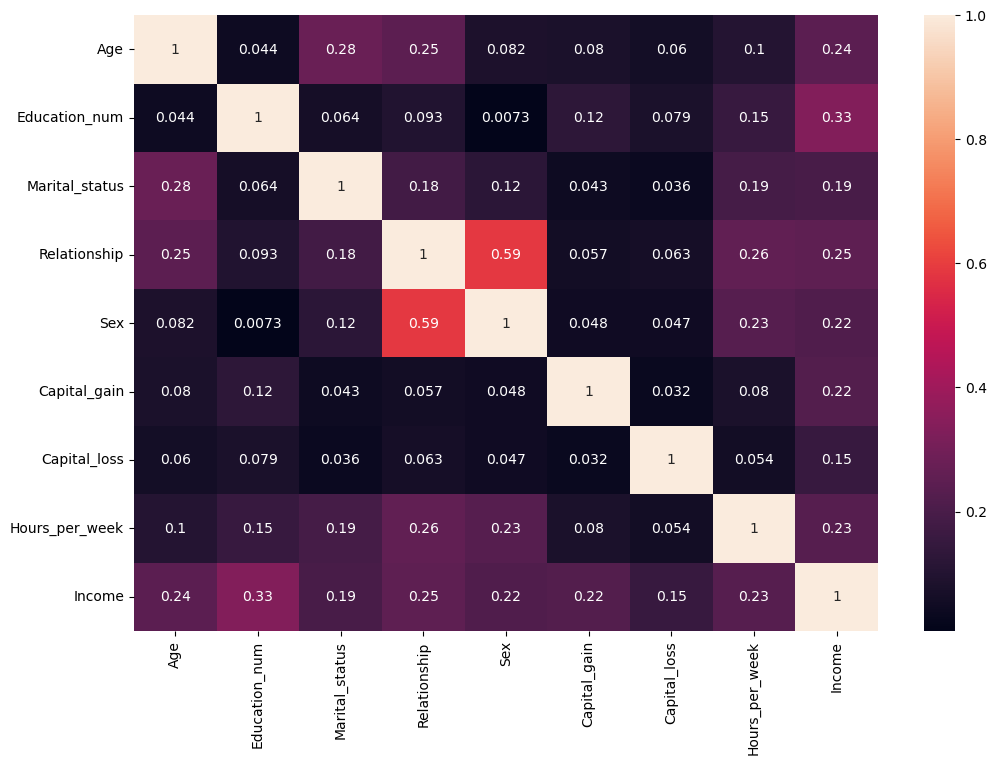

In [494]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

### Removing Outliners

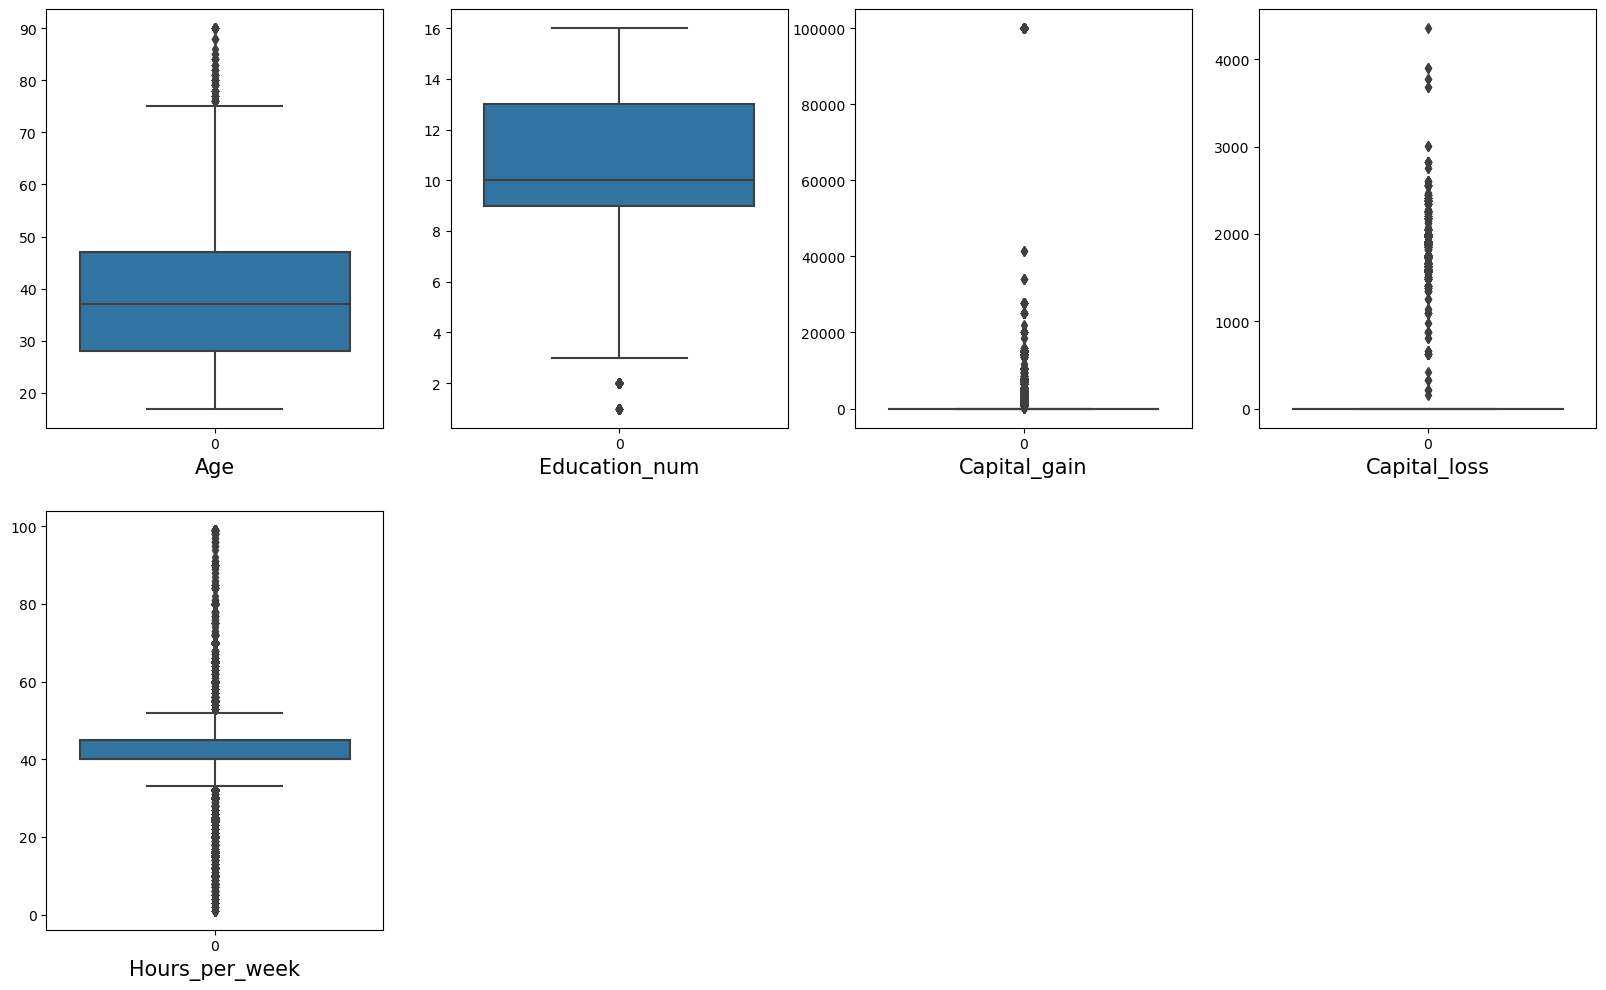

In [499]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df[['Age', 'Education_num', 'Capital_gain','Capital_loss', 'Hours_per_week']]: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df1[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [500]:
from scipy.stats import zscore 

z_score = zscore (df[['Age', 'Education_num', 'Capital_gain','Capital_loss', 'Hours_per_week']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.5).all(axis=1)
df = df[filtering_entry]

df.describe()

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,27399.000000,27399.000000,27399.000000,27399.000000,27399.000000,27399.000000,27399.000000,27399.000000,27399.000000
mean,37.720574,10.206066,2.577795,1.447425,0.669842,572.639220,1.034563,40.794080,0.765393
std,12.373386,2.335535,1.501829,1.605865,0.470278,2296.542574,28.869400,9.847987,0.423761
min,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
25%,28.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,10.000000,2.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000
75%,46.000000,12.000000,4.000000,3.000000,1.000000,0.000000,0.000000,45.000000,1.000000
max,71.000000,16.000000,6.000000,5.000000,1.000000,15831.000000,1092.000000,70.000000,1.000000


In [501]:
df.columns

Index(['Age', 'Education_num', 'Marital_status', 'Relationship', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

# 

### Removing Skewness

In [502]:
df.skew()

Age                0.378375
Education_num      0.003781
Marital_status    -0.054765
Relationship       0.784185
Sex               -0.722357
Capital_gain       4.736047
Capital_loss      30.380548
Hours_per_week    -0.124099
Income            -1.252652
dtype: float64

In [504]:
df['Relationship'] = np.log1p(df['Relationship'])
df['Sex'] = np.log1p(df['Sex'])
df['Capital_gain'] = np.log1p(df['Capital_gain'])
df['Capital_loss'] = np.log1p(df['Capital_loss'])

In [505]:
df.skew()

Age                0.378375
Education_num      0.003781
Marital_status    -0.054765
Relationship       0.028994
Sex               -0.722357
Capital_gain       3.068987
Capital_loss      25.845899
Hours_per_week    -0.124099
Income            -1.252652
dtype: float64

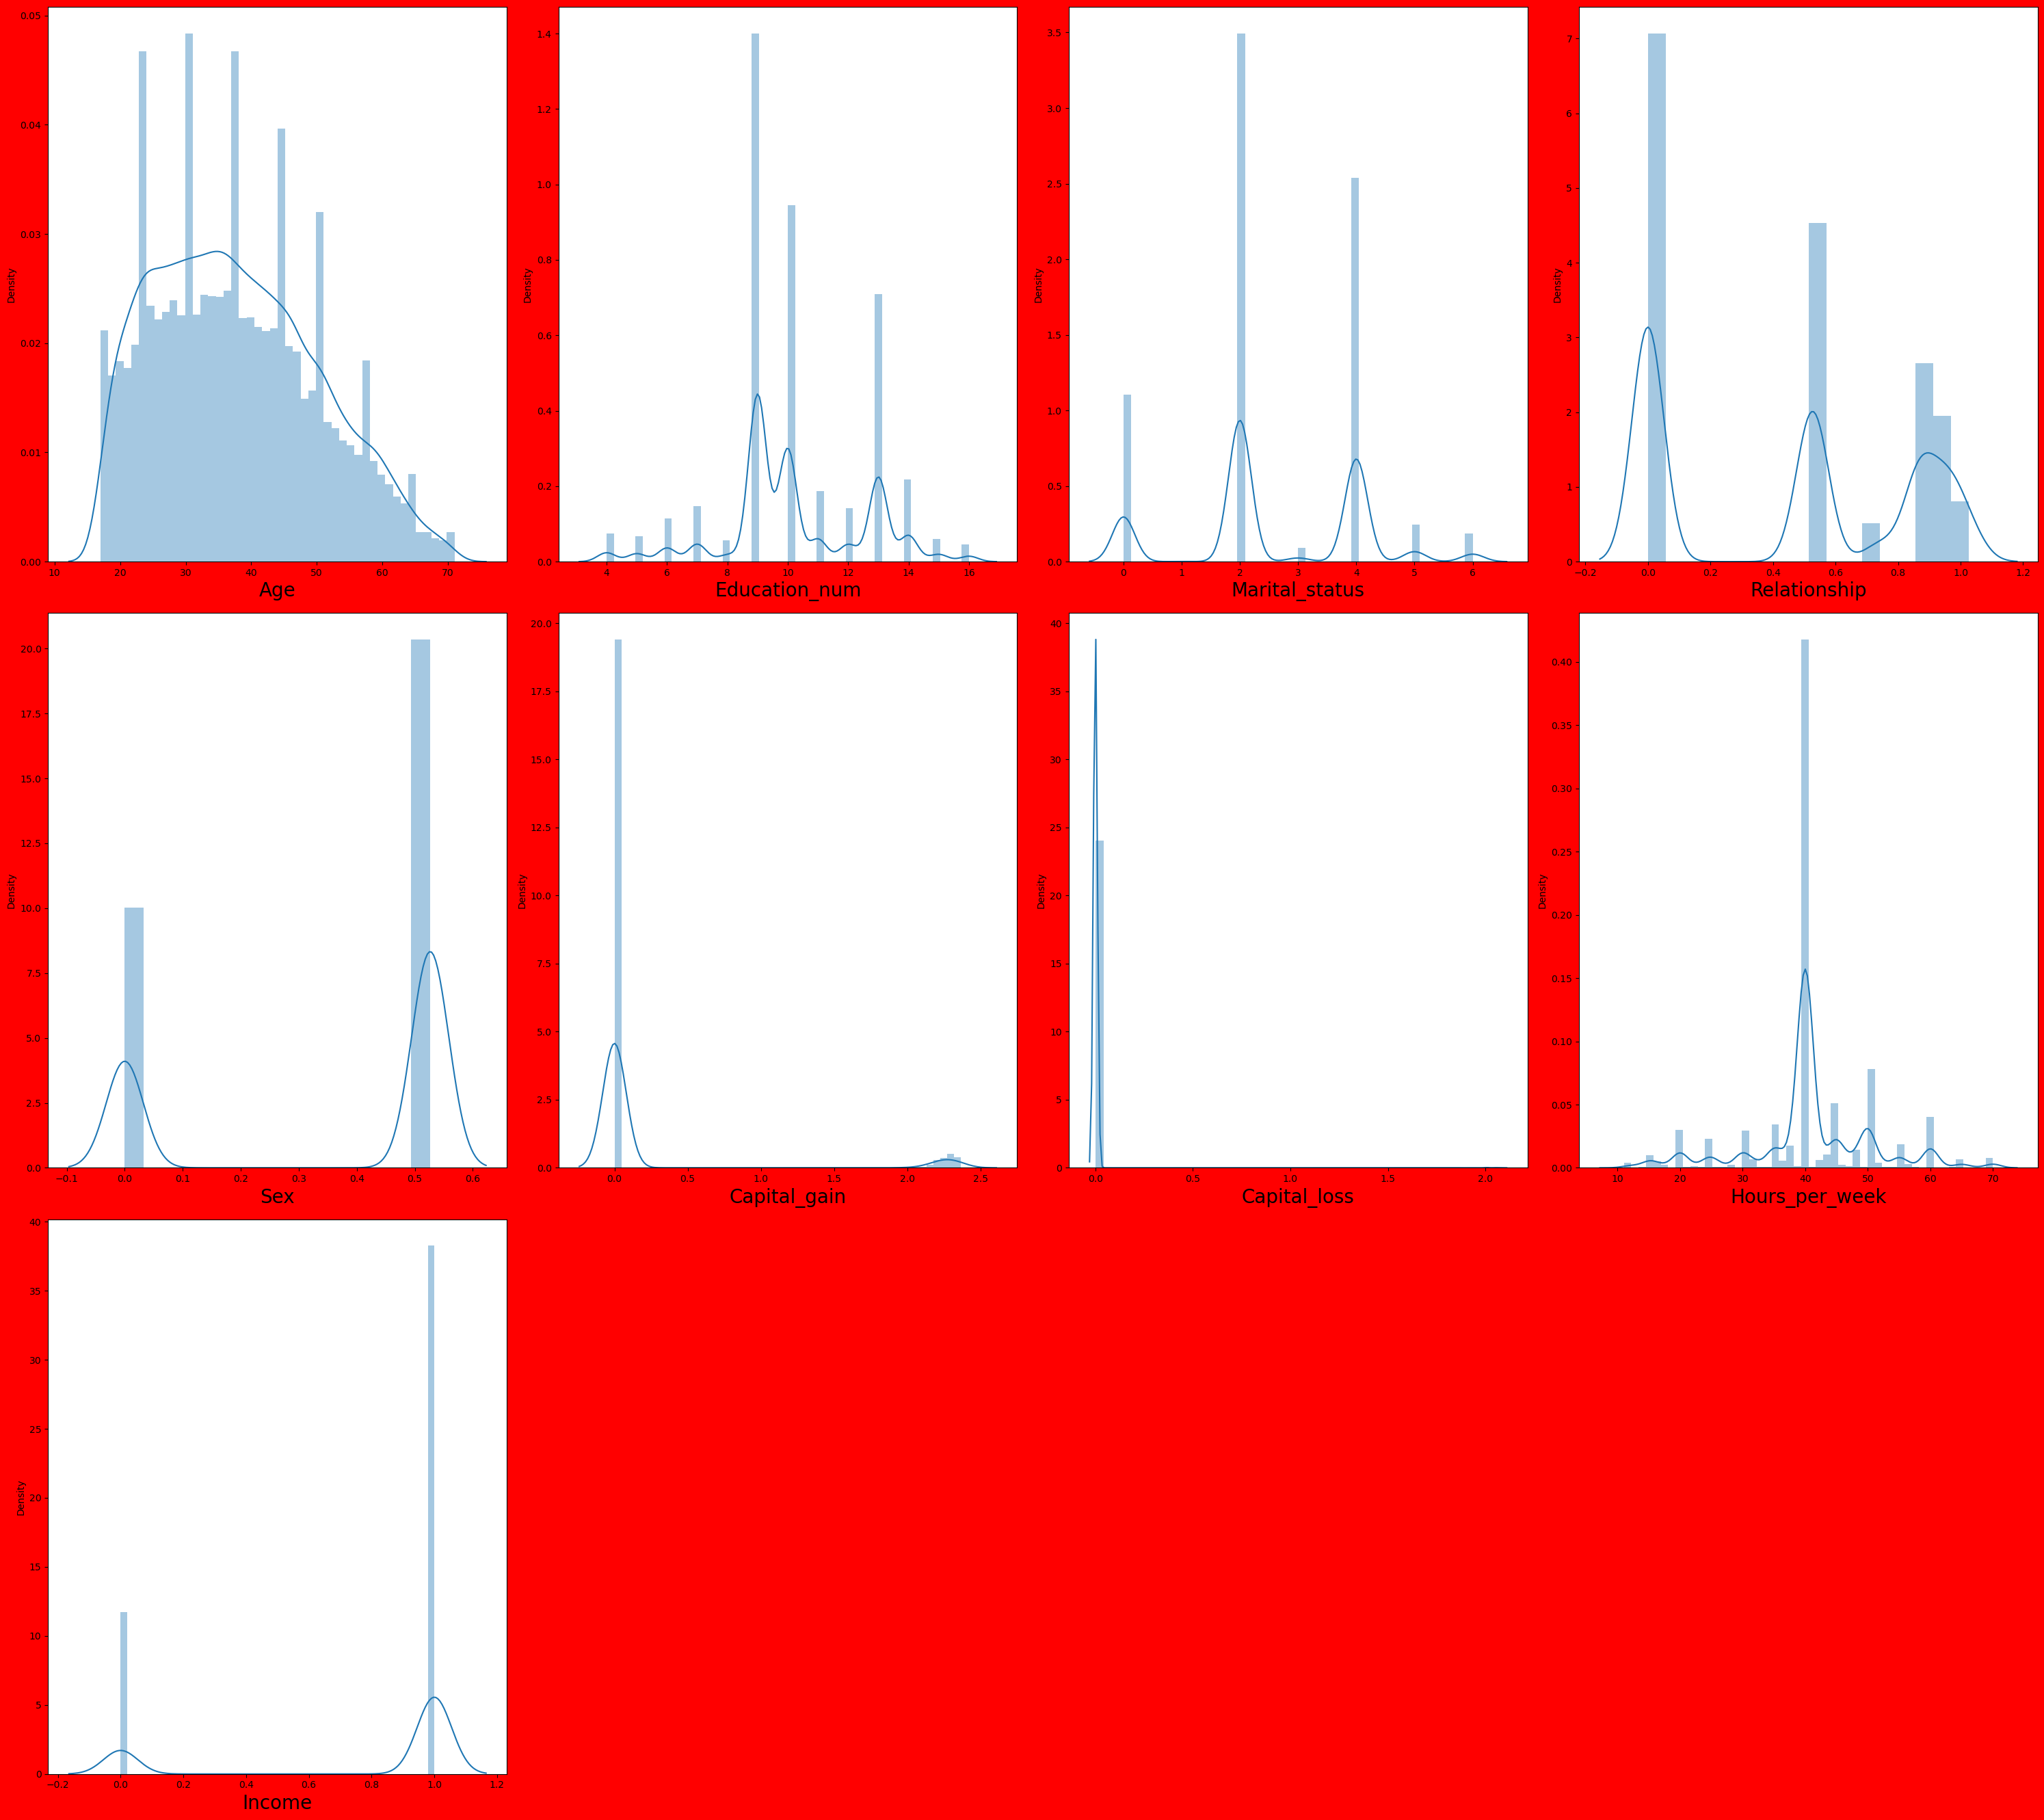

In [506]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

#  

### Oversampling

In [510]:
df["Income"].unique()

array([1, 0], dtype=int64)

In [511]:
x = df.drop(['Income'],axis=1)
y = df['Income']

In [512]:
from imblearn.over_sampling import SMOTE

In [513]:
upsample = SMOTE()

In [514]:
x, y = upsample.fit_resample(x,y)

In [515]:
from collections import Counter
count = Counter(y)
print(count)

Counter({1: 20971, 0: 20971})


# 

### Separating Features & Target

In [516]:
x = df.drop(columns=['Income'],axis=1)
y = df.Income

# 

### Standardization

In [517]:
from sklearn.preprocessing import StandardScaler

In [518]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

# 

### Train-Test split

In [519]:
from sklearn.model_selection import train_test_split

In [520]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

### Importing important Metrices

In [521]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

### Logistic Regression

In [522]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [523]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [524]:
cls_reg.coef_

array([[-0.44536246, -0.81573251,  0.27974343,  0.70179038, -0.07027948,
        -0.43736247,  0.06009611, -0.32515912]])

In [525]:
cls_reg.intercept_

array([1.77629333])

In [526]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.826366246532678


In [527]:
y_pred = cls_reg.predict(x_test)

In [528]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.821021897810219


In [529]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 724,  911],
       [ 315, 4900]], dtype=int64)

In [530]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.44      0.54      1635
           1       0.84      0.94      0.89      5215

    accuracy                           0.82      6850
   macro avg       0.77      0.69      0.72      6850
weighted avg       0.81      0.82      0.81      6850



### Cross-validation

In [531]:
from sklearn.model_selection import KFold, cross_val_score

In [532]:
cross_val_score (cls_reg, x_train, y_train, cv=5)

array([0.82992701, 0.82530414, 0.82554745, 0.82895377, 0.82136773])

In [533]:
cross_val_score (cls_reg, x_train, y_train, cv=5).mean()

0.8262200178943735

In [534]:
cross_val_score (cls_reg, x_test, y_test, cv=5)

array([0.80875912, 0.83065693, 0.8270073 , 0.81094891, 0.82335766])

In [535]:
cross_val_score (cls_reg, x_test, y_test, cv=5).mean()

0.8201459854014598

### ROC Curve

In [536]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [537]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.93959732 1.        ]
False Positive rate =  [0.         0.55718654 1.        ]


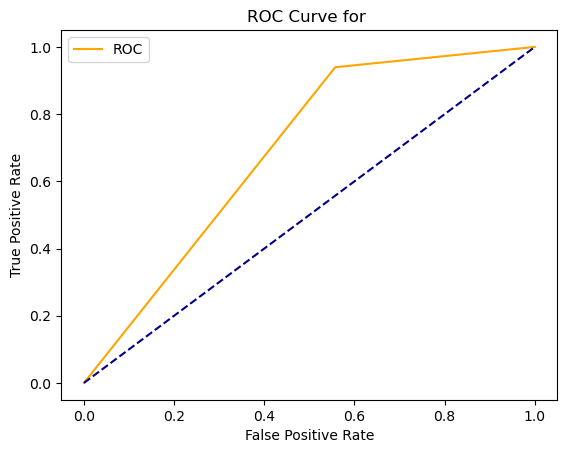

In [538]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to LogisticRegression

In [539]:
from sklearn.ensemble import BaggingClassifier

In [540]:
bag0 = BaggingClassifier(LogisticRegression())

In [541]:
bag0.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [542]:
print('Accuracy Score:',bag0.score(x_train, y_train))

Accuracy Score: 0.8261715898583872


In [543]:
y_pred = bag0.predict(x_test)

In [544]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8211678832116789


In [545]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 725,  910],
       [ 315, 4900]], dtype=int64)

In [546]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.44      0.54      1635
           1       0.84      0.94      0.89      5215

    accuracy                           0.82      6850
   macro avg       0.77      0.69      0.72      6850
weighted avg       0.81      0.82      0.81      6850



### Cross-validation

In [547]:
from sklearn.model_selection import KFold, cross_val_score

In [548]:
cross_val_score (bag0, x_train, y_train, cv=5)

array([0.83090024, 0.82506083, 0.82530414, 0.82871046, 0.82112436])

In [549]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.8260254062206338

In [550]:
cross_val_score (bag0, x_test, y_test, cv=5)

array([0.80875912, 0.82919708, 0.8270073 , 0.80875912, 0.82262774])

In [551]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.8261713560938869

### ROC Curve

In [552]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [553]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.93959732 1.        ]
False Positive rate =  [0.         0.55657492 1.        ]


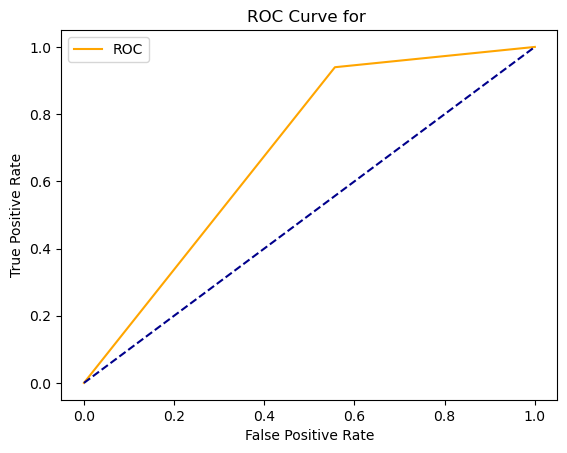

In [554]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### DecisionTreeClassifier

In [555]:
from sklearn.tree import DecisionTreeClassifier

In [556]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [561]:
cls_dt = DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=2,max_depth=6)

In [562]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

In [563]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.8511849725047448


In [564]:
y_pred = cls_dt.predict(x_test)

In [565]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8442335766423358


In [566]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 807,  828],
       [ 239, 4976]], dtype=int64)

In [567]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60      1635
           1       0.86      0.95      0.90      5215

    accuracy                           0.84      6850
   macro avg       0.81      0.72      0.75      6850
weighted avg       0.84      0.84      0.83      6850



### Cross-validation

In [568]:
from sklearn.model_selection import KFold, cross_val_score

In [569]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.84282238, 0.85012165, 0.84890511, 0.85304136, 0.8476515 ])

In [570]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.8485084015326869

In [571]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.82846715, 0.85182482, 0.84379562, 0.82992701, 0.84087591])

In [572]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.8389781021897811

### ROC Curve

In [573]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [574]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95417066 1.        ]
False Positive rate =  [0.         0.50642202 1.        ]


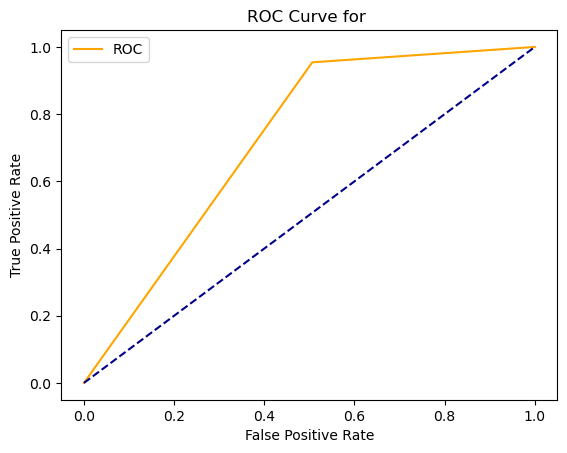

In [575]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to DecisionTreeClassifier

In [576]:
from sklearn.ensemble import BaggingClassifier

In [577]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=2,max_depth=6))

In [578]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                        min_samples_leaf=2))

In [579]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.852206920044771


In [580]:
y_pred = bag1.predict(x_test)

In [581]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8426277372262774


In [582]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 807,  828],
       [ 250, 4965]], dtype=int64)

In [583]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.49      0.60      1635
           1       0.86      0.95      0.90      5215

    accuracy                           0.84      6850
   macro avg       0.81      0.72      0.75      6850
weighted avg       0.83      0.84      0.83      6850



### Cross-validation

In [584]:
from sklearn.model_selection import KFold, cross_val_score

In [585]:
cross_val_score (bag1, x_train, y_train, cv=5)

array([0.84257908, 0.84987835, 0.85109489, 0.85328467, 0.85032855])

In [586]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.8490923786667329

In [587]:
cross_val_score (bag1, x_test, y_test, cv=5)

array([0.82408759, 0.84744526, 0.84525547, 0.83065693, 0.84671533])

In [588]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.8488976840938441

### ROC Curve

In [589]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [590]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95206136 1.        ]
False Positive rate =  [0.         0.50642202 1.        ]


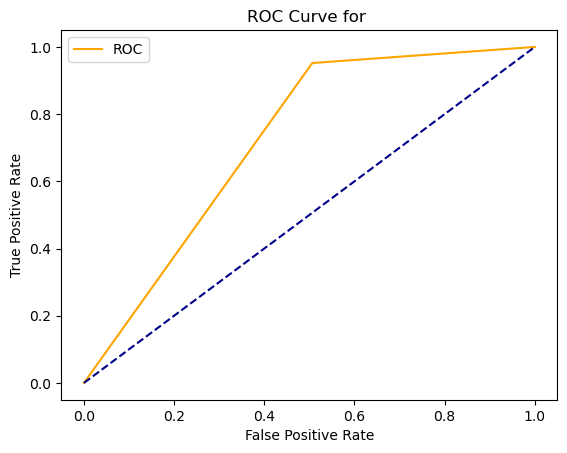

In [591]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Random Forest Classifier

In [592]:
from sklearn.ensemble import RandomForestClassifier

In [593]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 50}

In [594]:
cls_rf = RandomForestClassifier(n_estimators=50,max_features='log2',min_samples_split=5,max_depth=5)

In [595]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=5,
                       n_estimators=50)

In [596]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8426277372262774


In [597]:
y_pred = cls_rf.predict(x_test)

In [598]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8407299270072993


In [599]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 770,  865],
       [ 226, 4989]], dtype=int64)

In [600]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.47      0.59      1635
           1       0.85      0.96      0.90      5215

    accuracy                           0.84      6850
   macro avg       0.81      0.71      0.74      6850
weighted avg       0.83      0.84      0.83      6850



### Cross-validation

In [601]:
from sklearn.model_selection import KFold, cross_val_score

In [602]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.84087591, 0.84817518, 0.84841849, 0.85231144, 0.84716476])

In [603]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.8477784863681231

In [604]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.82992701, 0.84890511, 0.83941606, 0.83357664, 0.84890511])

In [605]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.8405839416058395

### ROC Curve

In [606]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [607]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95666347 1.        ]
False Positive rate =  [0.         0.52905199 1.        ]


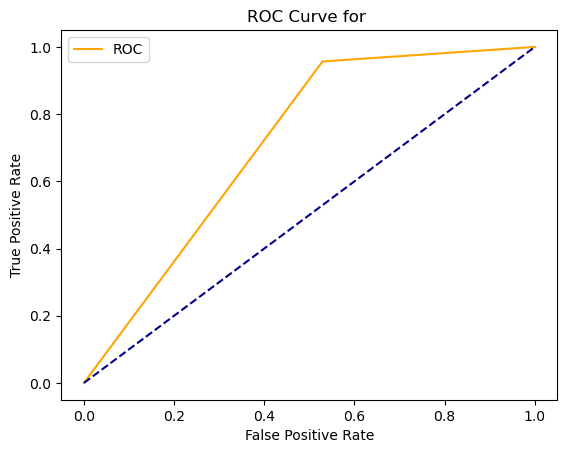

In [608]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to RandomForestClassifier

In [610]:
from sklearn.ensemble import BaggingClassifier

In [611]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=50,max_features='log2',min_samples_split=5,max_depth=5))

In [612]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                        max_features='log2',
                                                        min_samples_split=5,
                                                        n_estimators=50))

In [613]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.8484597790646747


In [614]:
y_pred = bag2.predict(x_test)

In [615]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8402919708029197


In [616]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 759,  876],
       [ 218, 4997]], dtype=int64)

In [617]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.46      0.58      1635
           1       0.85      0.96      0.90      5215

    accuracy                           0.84      6850
   macro avg       0.81      0.71      0.74      6850
weighted avg       0.83      0.84      0.82      6850



### Cross-validation

In [618]:
from sklearn.model_selection import KFold, cross_val_score

In [619]:
cross_val_score (bag2, x_train, y_train, cv=5)

array([0.84233577, 0.84914842, 0.84768856, 0.85158151, 0.84692139])

In [620]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.8475351536802188

In [621]:
cross_val_score (bag2, x_test, y_test, cv=5)

array([0.82846715, 0.84671533, 0.84087591, 0.8350365 , 0.84525547])

In [622]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.8473891564360233

### ROC Curve

In [623]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [624]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95819751 1.        ]
False Positive rate =  [0.         0.53577982 1.        ]


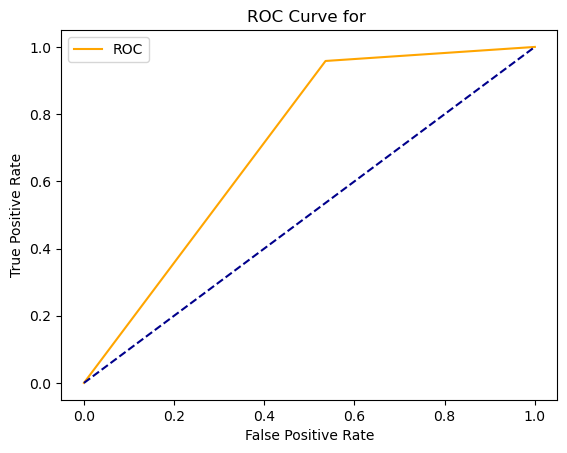

In [625]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### KNeighbors Classifier

In [626]:
from sklearn.neighbors import KNeighborsClassifier

In [628]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2,3,4]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [629]:
cls_KN = KNeighborsClassifier(n_neighbors=10, leaf_size=10, p = 1,  weights = 'uniform')

In [630]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, p=1)

In [631]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 0.8504550099761545


In [632]:
y_pred = cls_KN.predict(x_test)

In [633]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8237956204379562


In [634]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 983,  652],
       [ 555, 4660]], dtype=int64)

In [635]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      1635
           1       0.88      0.89      0.89      5215

    accuracy                           0.82      6850
   macro avg       0.76      0.75      0.75      6850
weighted avg       0.82      0.82      0.82      6850



### Cross-validation

In [636]:
from sklearn.model_selection import KFold, cross_val_score

In [637]:
cross_val_score (cls_KN, x_train, y_train, cv=15)

array([0.84087591, 0.82919708, 0.82773723, 0.82189781, 0.82919708,
       0.81605839, 0.83576642, 0.82627737, 0.82773723, 0.83065693,
       0.82481752, 0.81824818, 0.83430657, 0.8189781 , 0.81957633])

In [638]:
cross_val_score (cls_KN, x_train, y_train, cv=5).mean()

0.8284587567851472

In [639]:
cross_val_score (cls_KN, x_test, y_test, cv=15)

array([0.78774617, 0.80743982, 0.82056893, 0.83150985, 0.8380744 ,
       0.83369803, 0.80962801, 0.80306346, 0.8512035 , 0.8249453 ,
       0.82894737, 0.78070175, 0.81578947, 0.77631579, 0.8245614 ])

In [640]:
cross_val_score (cls_KN, x_test, y_test, cv=5).mean()

0.810948905109489

### ROC Curve

In [641]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [642]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89357622 1.        ]
False Positive rate =  [0.         0.39877676 1.        ]


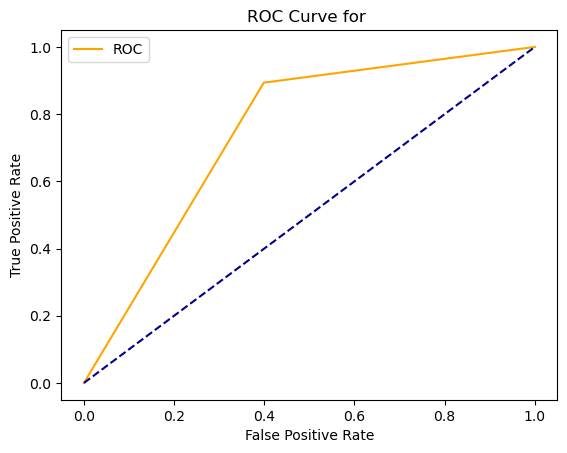

In [643]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to KNeighborsClassifier

In [644]:
from sklearn.ensemble import BaggingClassifier

In [652]:
bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=10, leaf_size=10, p = 1,  weights = 'uniform'))

In [653]:
bag3.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=10,
                                                      n_neighbors=10, p=1))

In [654]:
print('Accuracy Score:',bag3.score(x_train, y_train))

Accuracy Score: 0.8554187551705679


In [655]:
y_pred = bag3.predict(x_test)

In [656]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.828905109489051


In [657]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 870,  765],
       [ 407, 4808]], dtype=int64)

In [658]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.53      0.60      1635
           1       0.86      0.92      0.89      5215

    accuracy                           0.83      6850
   macro avg       0.77      0.73      0.74      6850
weighted avg       0.82      0.83      0.82      6850



### Cross-validation

In [659]:
from sklearn.model_selection import KFold, cross_val_score

In [660]:
cross_val_score (bag3, x_train, y_train, cv=5)

array([0.83722628, 0.82749392, 0.84233577, 0.83163017, 0.83037235])

In [661]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.836196219917231

In [662]:
cross_val_score (bag3, x_test, y_test, cv=5)

array([0.80948905, 0.82919708, 0.82043796, 0.81167883, 0.81532847])

In [663]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.8340062138833574

### ROC Curve

In [664]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [665]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.        0.9219559 1.       ]
False Positive rate =  [0.         0.46788991 1.        ]


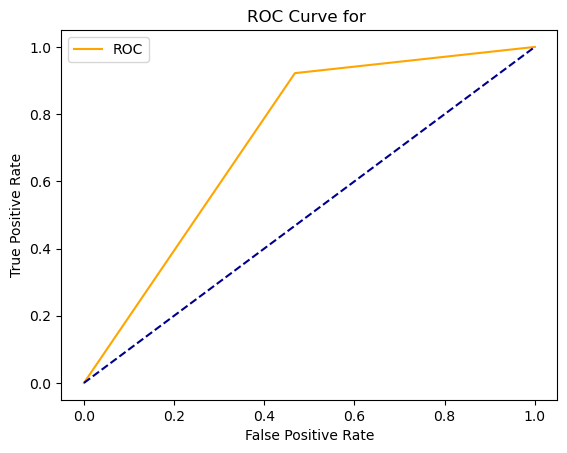

In [666]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### GradientBoostingClassifier

In [667]:
from sklearn.ensemble import GradientBoostingClassifier

In [669]:
cls_gb = GradientBoostingClassifier(n_estimators=14,learning_rate=1,max_depth=5)

In [670]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=14)

In [671]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.8653462455593947


In [672]:
y_pred = cls_gb.predict(x_test)

In [673]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8435036496350365


In [674]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 928,  707],
       [ 365, 4850]], dtype=int64)

In [675]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.57      0.63      1635
           1       0.87      0.93      0.90      5215

    accuracy                           0.84      6850
   macro avg       0.80      0.75      0.77      6850
weighted avg       0.84      0.84      0.84      6850



### Cross-validation

In [676]:
from sklearn.model_selection import KFold, cross_val_score

In [677]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.84355231, 0.85085158, 0.84720195, 0.84793187, 0.84984181])

In [678]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.8468540187434976

In [679]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.81386861, 0.84525547, 0.83649635, 0.82189781, 0.83576642])

In [680]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.8477785692672721

### ROC Curve

In [681]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [682]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.93000959 1.        ]
False Positive rate =  [0.        0.4324159 1.       ]


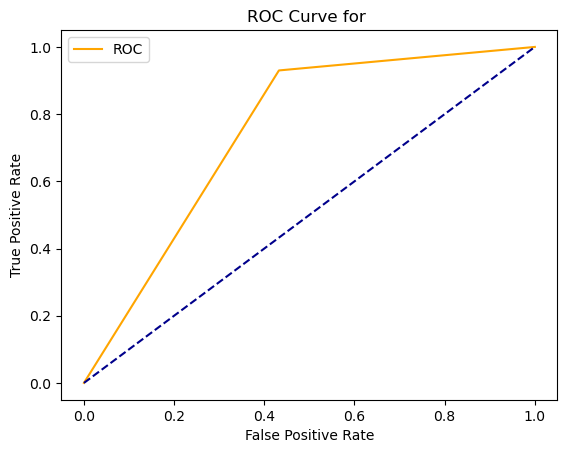

In [683]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GradientBoostingClassifier

In [684]:
from sklearn.ensemble import BaggingClassifier

In [691]:
bag5 = BaggingClassifier(GradientBoostingClassifier(n_estimators=14,learning_rate=1,max_depth=5))

In [692]:
bag5.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            max_depth=5,
                                                            n_estimators=14))

In [693]:
print('Accuracy Score:',bag5.score(x_train, y_train))

Accuracy Score: 0.8681201031680373


In [694]:
y_pred = bag5.predict(x_test)

In [695]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8486131386861314


In [696]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 962,  673],
       [ 364, 4851]], dtype=int64)

In [697]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65      1635
           1       0.88      0.93      0.90      5215

    accuracy                           0.85      6850
   macro avg       0.80      0.76      0.78      6850
weighted avg       0.84      0.85      0.84      6850



### Cross-validation

In [698]:
from sklearn.model_selection import KFold, cross_val_score

In [699]:
cross_val_score (bag5, x_train, y_train, cv=5)

array([0.85085158, 0.85231144, 0.85523114, 0.84890511, 0.85762959])

In [700]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.8528881412175162

In [701]:
cross_val_score (bag5, x_test, y_test, cv=5)

array([0.82846715, 0.85620438, 0.84379562, 0.8350365 , 0.85255474])

In [702]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.8523042825108258

### ROC Curve

In [703]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [704]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.93020134 1.        ]
False Positive rate =  [0.        0.4116208 1.       ]


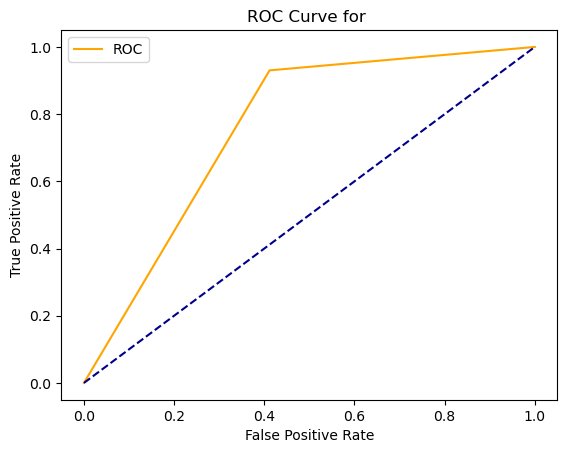

In [705]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### GaussianNB

In [706]:
from sklearn.naive_bayes import GaussianNB

In [707]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-05}

In [708]:
gnb = GaussianNB(var_smoothing=1e-05)

In [709]:
gnb.fit(x_train, y_train)

GaussianNB(var_smoothing=1e-05)

In [710]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.749574188524989


In [711]:
y_pred = gnb.predict(x_test)

In [712]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7509489051094891


In [713]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1311,  324],
       [1382, 3833]], dtype=int64)

In [714]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.80      0.61      1635
           1       0.92      0.73      0.82      5215

    accuracy                           0.75      6850
   macro avg       0.70      0.77      0.71      6850
weighted avg       0.82      0.75      0.77      6850



### Cross-validation

In [715]:
from sklearn.model_selection import KFold, cross_val_score

In [716]:
cross_val_score (gnb, x_train, y_train, cv=5)

array([0.76690998, 0.74890511, 0.74622871, 0.75304136, 0.53808713])

In [717]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.710634456794444

In [718]:
cross_val_score (gnb, x_test, y_test, cv=5)

array([0.79051095, 0.5729927 , 0.79927007, 0.79708029, 0.81167883])

In [719]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.710634456794444

### ROC Curve

In [720]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [721]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.73499521 1.        ]
False Positive rate =  [0.         0.19816514 1.        ]


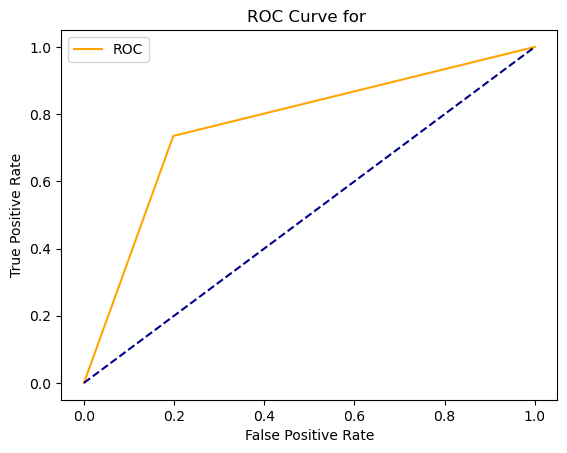

In [722]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GaussianNB

In [293]:
from sklearn.ensemble import BaggingClassifier

In [723]:
bag6 = BaggingClassifier(GaussianNB(var_smoothing=1e-05))

In [724]:
bag6.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(var_smoothing=1e-05))

In [725]:
print('Accuracy Score:',bag6.score(x_train, y_train))

Accuracy Score: 0.7380407805732639


In [726]:
y_pred = bag6.predict(x_test)

In [727]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7386861313868613


In [728]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1328,  307],
       [1483, 3732]], dtype=int64)

In [729]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.81      0.60      1635
           1       0.92      0.72      0.81      5215

    accuracy                           0.74      6850
   macro avg       0.70      0.76      0.70      6850
weighted avg       0.82      0.74      0.76      6850



### Cross-validation

In [730]:
from sklearn.model_selection import KFold, cross_val_score

In [731]:
cross_val_score (bag6, x_train, y_train, cv=5)

array([0.59489051, 0.71678832, 0.63990268, 0.70243309, 0.53589681])

In [732]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.6885906256457993

In [733]:
cross_val_score (bag6, x_test, y_test, cv=5)

array([0.73211679, 0.61751825, 0.72773723, 0.68540146, 0.69708029])

In [734]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.7008537664932298

### ROC Curve

In [735]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [736]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.       0.715628 1.      ]
False Positive rate =  [0.         0.18776758 1.        ]


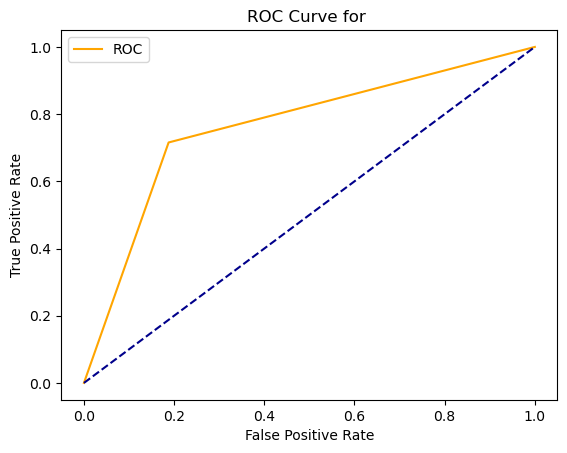

In [737]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Best Model

### DecisionTreeClassifier

In [555]:
from sklearn.tree import DecisionTreeClassifier

In [556]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [561]:
cls_dt = DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=2,max_depth=6)

In [562]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

In [563]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.8511849725047448


In [564]:
y_pred = cls_dt.predict(x_test)

In [565]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8442335766423358


In [566]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 807,  828],
       [ 239, 4976]], dtype=int64)

In [567]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60      1635
           1       0.86      0.95      0.90      5215

    accuracy                           0.84      6850
   macro avg       0.81      0.72      0.75      6850
weighted avg       0.84      0.84      0.83      6850



### Cross-validation

In [568]:
from sklearn.model_selection import KFold, cross_val_score

In [569]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.84282238, 0.85012165, 0.84890511, 0.85304136, 0.8476515 ])

In [570]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.8485084015326869

In [571]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.82846715, 0.85182482, 0.84379562, 0.82992701, 0.84087591])

In [572]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.8389781021897811

### ROC Curve

In [573]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [574]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95417066 1.        ]
False Positive rate =  [0.         0.50642202 1.        ]


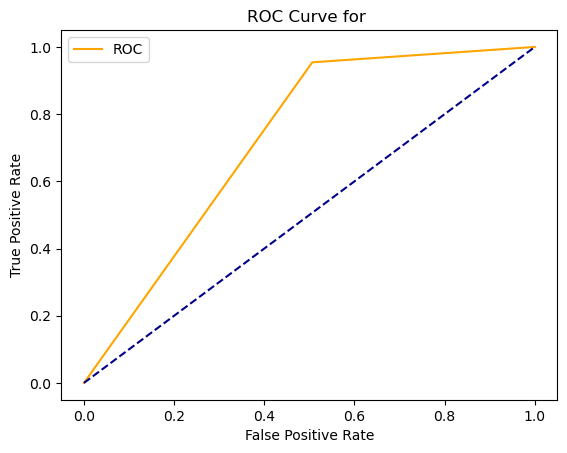

In [575]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Saving the Best Model

In [143]:
import pickle

In [147]:
with open('cdt', 'wb') as f: 
    pickle.dump(cls_dt, f)

# 

# 

# 

# 

# 

# Loan Application Status Prediction

In [739]:
import warnings
warnings.filterwarnings ('ignore')

### Import Data from Website

In [740]:
import pandas as pd
import numpy as np

In [741]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [742]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 

### EDA

In [743]:
df.shape

(614, 13)

In [744]:
df.drop_duplicates(inplace=True)
df.shape

(614, 13)

In [745]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##### Dropping columns that have only single values or irrelevent data

In [747]:
df.drop(['Loan_ID'], axis=1,inplace=True)

In [748]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [749]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [750]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [751]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# 

### Imputation of Categorical Columns

In [752]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [753]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [754]:
df['Gender'].isnull().sum()

13

In [755]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [756]:
df[['Gender']]=mode_imp.fit_transform(df[['Gender']])

In [757]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [758]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [759]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [760]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [761]:
df['Married'].isnull().sum()

3

In [762]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [763]:
df[['Married']]=mode_imp.fit_transform(df[['Married']])

In [765]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [766]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [767]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [768]:
df['Dependents'].isnull().sum()

15

In [769]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [770]:
df[['Dependents']]=mode_imp.fit_transform(df[['Dependents']])

In [771]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [772]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [773]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [774]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [775]:
df['Self_Employed'].isnull().sum()

32

In [776]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [777]:
df[['Self_Employed']]=mode_imp.fit_transform(df[['Self_Employed']])

In [778]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [779]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

# 

### Impution of Continious values

In [780]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [781]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [785]:
from sklearn.impute import SimpleImputer

In [786]:
imputer = SimpleImputer(strategy='mean')

In [787]:
imputer.fit(df[['LoanAmount']])
df['LoanAmount'] = imputer.transform(df[['LoanAmount']])

In [788]:
imputer.fit(df[['Loan_Amount_Term']])
df['Loan_Amount_Term'] = imputer.transform(df[['Loan_Amount_Term']])

In [789]:
imputer.fit(df[['Credit_History']])
df['Credit_History'] = imputer.transform(df[['Credit_History']])

In [790]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [791]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 

### Encoding

In [792]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [793]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [800]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [801]:
df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Dependents = le.fit_transform(df.Dependents)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


In [805]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [806]:
df['Loan_Status']=df['Loan_Status'].replace('Y', 1)
df['Loan_Status']=df['Loan_Status'].replace('N', 0)

In [807]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [808]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

In [809]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# 

### Checking Contribution Score

In [810]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [811]:
df.shape

(614, 12)

In [812]:
from sklearn.feature_selection import SelectKBest, f_classif

In [813]:
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [814]:
best_features = SelectKBest(score_func=f_classif, k=11)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(11, 'Score'))

         Feature_Name       Score
9      Credit_History  252.555883
1             Married    5.164552
3           Education    4.547685
6   CoapplicantIncome    2.151457
7          LoanAmount    0.812667
10      Property_Area    0.631733
8    Loan_Amount_Term    0.269339
0              Gender    0.198059
2          Dependents    0.062665
5     ApplicantIncome    0.013574
4       Self_Employed    0.008380


In [815]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [816]:
df = df.drop(columns=['Self_Employed','ApplicantIncome','Gender','Dependents','LoanAmount','Property_Area','Loan_Amount_Term'])
df.head()

,Married,Education,CoapplicantIncome,Credit_History,Loan_Status
0,0,0,0.0,1.0,1
1,1,0,1508.0,1.0,0
2,1,0,0.0,1.0,1
3,1,1,2358.0,1.0,1
4,0,0,0.0,1.0,1


# 

### Checking Multi-colinearity

In [817]:
corr = df.corr()
corr

,Married,Education,CoapplicantIncome,Credit_History,Loan_Status
Married,1.000000,0.012304,0.075948,0.005852,0.091478
Education,0.012304,1.000000,-0.062290,-0.077936,-0.085884
CoapplicantIncome,0.075948,-0.062290,1.000000,-0.001665,-0.059187
Credit_History,0.005852,-0.077936,-0.001665,1.000000,0.540483
Loan_Status,0.091478,-0.085884,-0.059187,0.540483,1.000000


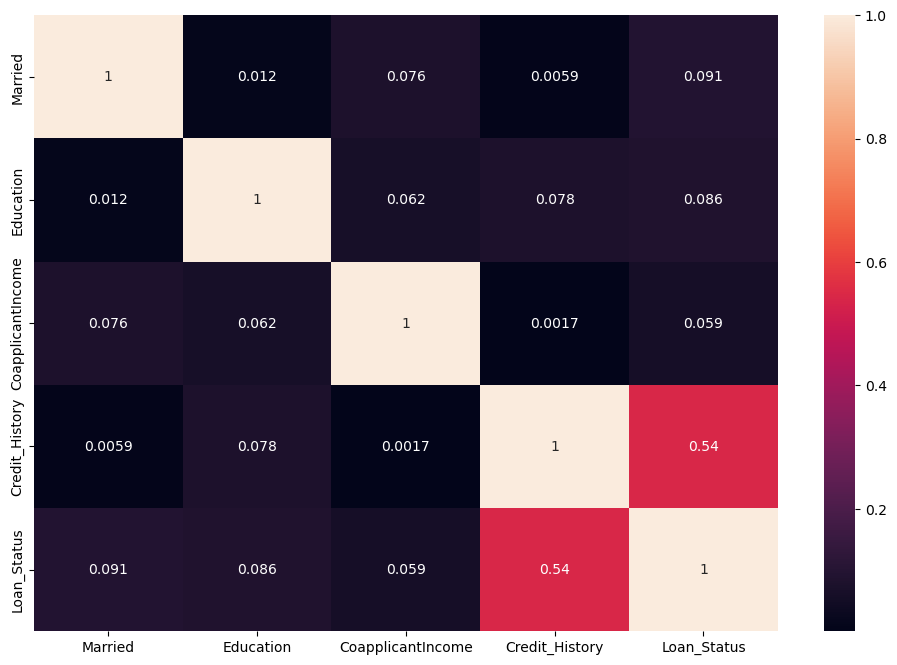

In [818]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

### Removing Skewness

In [819]:
df.columns

Index(['Married', 'Education', 'CoapplicantIncome', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [820]:
df.skew()

Married             -0.644850
Education            1.367622
CoapplicantIncome    7.491531
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

In [822]:
df['Married'] = np.log1p(df['Married'])
df['Education'] = np.log1p(df['Education'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

In [823]:
df.skew()

Married             -0.644850
Education            1.367622
CoapplicantIncome   -0.213633
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

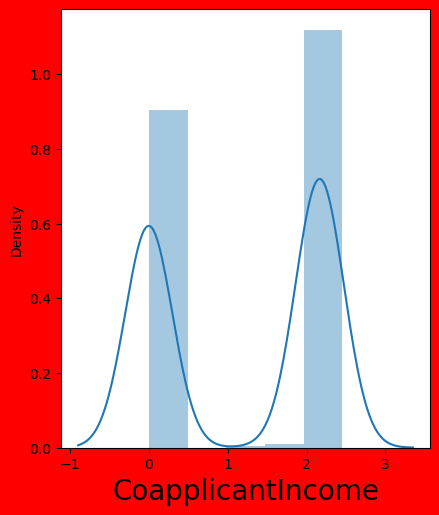

In [825]:
plt.figure(figsize=(16,20), facecolor='red')
plotnumber = 1

for column in df[['CoapplicantIncome']]:                       
    if plotnumber<=2:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[['CoapplicantIncome']])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

# 

### Checking Outliners

In [826]:
df.columns

Index(['Married', 'Education', 'CoapplicantIncome', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [827]:
df.head()

,Married,Education,CoapplicantIncome,Credit_History,Loan_Status
0,0.000000,0.000000,0.000000,1.0,1
1,0.526589,0.000000,2.118566,1.0,0
2,0.526589,0.000000,0.000000,1.0,1
3,0.526589,0.526589,2.170880,1.0,1
4,0.000000,0.000000,0.000000,1.0,1


In [828]:
df1=df[['CoapplicantIncome']]

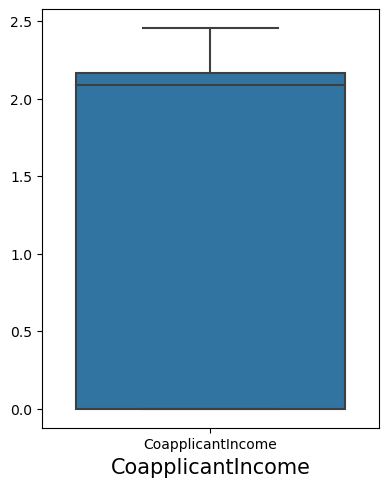

In [829]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df1: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df1)   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [830]:
df.shape

(614, 5)

###### No outliners found

# 

### Oversampling

In [834]:
df["Loan_Status"].unique()

array([1, 0], dtype=int64)

In [835]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [836]:
from imblearn.over_sampling import SMOTE

In [837]:
upsample = SMOTE()

In [838]:
x, y = upsample.fit_resample(x,y)

In [839]:
from collections import Counter
count = Counter(y)
print(count)

Counter({1: 422, 0: 422})


# 

### Separating Features & Target

In [840]:
x = df.drop(columns=['Loan_Status'],axis=1)
y = df.Loan_Status

# 

### Standardization

In [841]:
from sklearn.preprocessing import StandardScaler

In [842]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

# 

### Train-Test split

In [843]:
from sklearn.model_selection import train_test_split

In [844]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

### Importing important Metrices

In [845]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

### Logistic Regression

In [846]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [847]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [848]:
cls_reg.coef_

array([[ 0.14750613, -0.18811884,  0.0758398 ,  1.2900132 ]])

In [849]:
cls_reg.intercept_

array([0.74625702])

In [850]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [851]:
y_pred = cls_reg.predict(x_test)

In [852]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [853]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [854]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [855]:
from sklearn.model_selection import KFold, cross_val_score

In [856]:
cross_val_score (cls_reg, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.75      , 0.81521739])

In [857]:
cross_val_score (cls_reg, x_train, y_train, cv=5).mean()

0.8021739130434783

In [858]:
cross_val_score (cls_reg, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.74193548, 0.80645161, 0.86666667])

In [859]:
cross_val_score (cls_reg, x_test, y_test, cv=5).mean()

0.8313978494623655

### ROC Curve

In [860]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [861]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


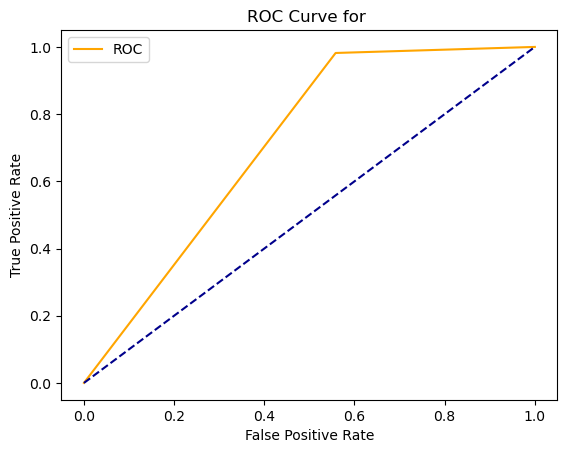

In [862]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to LogisticRegression

In [863]:
from sklearn.ensemble import BaggingClassifier

In [864]:
bag0 = BaggingClassifier(LogisticRegression())

In [865]:
bag0.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [866]:
print('Accuracy Score:',bag0.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [867]:
y_pred = bag0.predict(x_test)

In [868]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [869]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [870]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [871]:
from sklearn.model_selection import KFold, cross_val_score

In [872]:
cross_val_score (bag0, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.75      , 0.81521739])

In [873]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.7978260869565217

In [874]:
cross_val_score (bag0, x_test, y_test, cv=5)

array([0.83870968, 0.87096774, 0.74193548, 0.80645161, 0.86666667])

In [875]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.8

### ROC Curve

In [876]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [877]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


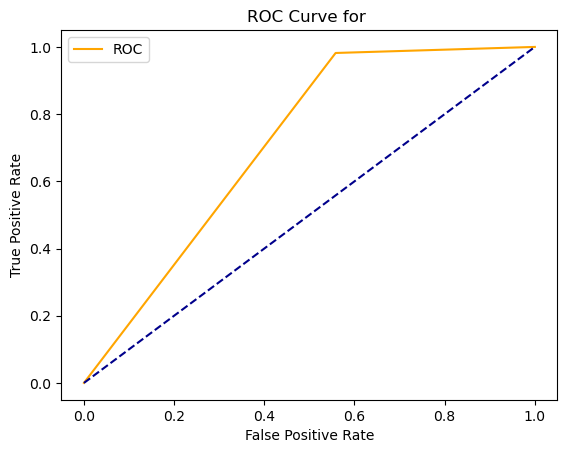

In [878]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### DecisionTreeClassifier

In [879]:
from sklearn.tree import DecisionTreeClassifier

In [880]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [882]:
cls_dt = DecisionTreeClassifier(criterion='gini',max_features='sqrt', min_samples_leaf=4, min_samples_split=2,max_depth=4)

In [883]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4)

In [884]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.8065217391304348


In [885]:
y_pred = cls_dt.predict(x_test)

In [886]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8376623376623377


In [887]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 20,  23],
       [  2, 109]], dtype=int64)

In [888]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



### Cross-validation

In [889]:
from sklearn.model_selection import KFold, cross_val_score

In [890]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.69565217, 0.81521739])

In [891]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.7869565217391304

In [892]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.83870968, 0.83870968, 0.77419355, 0.83870968, 0.8       ])

In [893]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.7989247311827957

### ROC Curve

In [894]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [895]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.53488372 1.        ]


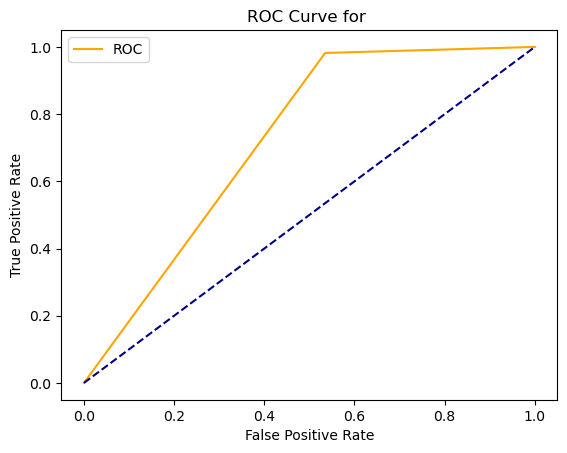

In [896]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to DecisionTreeClassifier

In [897]:
from sklearn.ensemble import BaggingClassifier

In [898]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_features='sqrt', min_samples_leaf=4, min_samples_split=2,max_depth=4))

In [899]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        max_features='sqrt',
                                                        min_samples_leaf=4))

In [900]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [901]:
y_pred = bag1.predict(x_test)

In [902]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8376623376623377


In [903]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 20,  23],
       [  2, 109]], dtype=int64)

In [904]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



### Cross-validation

In [905]:
from sklearn.model_selection import KFold, cross_val_score

In [906]:
cross_val_score (bag1, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.79347826, 0.73913043, 0.81521739])

In [907]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.8021739130434783

In [908]:
cross_val_score (bag1, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.74193548, 0.80645161, 0.83333333])

In [909]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.8

### ROC Curve

In [910]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [911]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.53488372 1.        ]


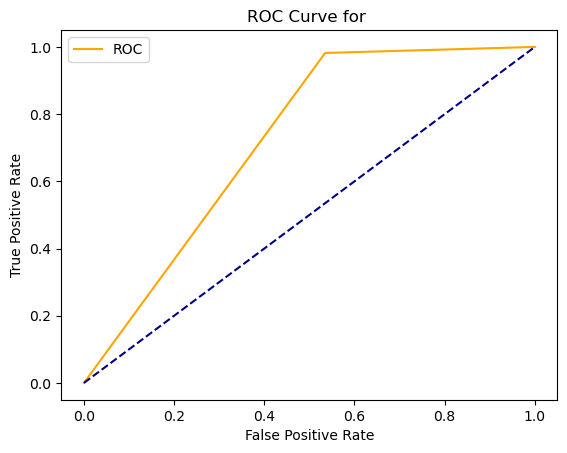

In [912]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Random Forest Classifier

In [913]:
from sklearn.ensemble import RandomForestClassifier

In [914]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 3,
 'n_estimators': 25}

In [919]:
cls_rf = RandomForestClassifier(n_estimators=25,max_features='sqrt',min_samples_split=5,max_depth=25)

In [920]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_split=5,
                       n_estimators=25)

In [921]:
print('Accuracy Score:',cls_rf.score(x_train, y_train))

Accuracy Score: 0.8695652173913043


In [922]:
y_pred = cls_rf.predict(x_test)

In [923]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7727272727272727


In [924]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[21, 22],
       [13, 98]], dtype=int64)

In [925]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.49      0.55        43
           1       0.82      0.88      0.85       111

    accuracy                           0.77       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.76      0.77      0.76       154



### Cross-validation

In [926]:
from sklearn.model_selection import KFold, cross_val_score

In [927]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.77173913, 0.77173913, 0.81521739, 0.65217391, 0.72826087])

In [928]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.7543478260869565

In [929]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.83870968, 0.87096774, 0.74193548, 0.80645161, 0.8       ])

In [930]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.818279569892473

### ROC Curve

In [931]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [932]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.88288288 1.        ]
False Positive rate =  [0.         0.51162791 1.        ]


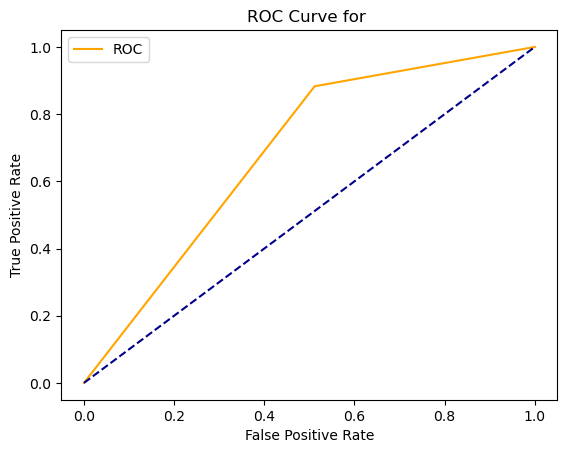

In [933]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to RandomForestClassifier

In [934]:
from sklearn.ensemble import BaggingClassifier

In [935]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=25,max_features='sqrt',min_samples_split=5,max_depth=25))

In [936]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=25,
                                                        max_features='sqrt',
                                                        min_samples_split=5,
                                                        n_estimators=25))

In [937]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.8260869565217391


In [938]:
y_pred = bag2.predict(x_test)

In [939]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8051948051948052


In [940]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  6, 105]], dtype=int64)

In [941]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56        43
           1       0.81      0.95      0.88       111

    accuracy                           0.81       154
   macro avg       0.79      0.69      0.72       154
weighted avg       0.80      0.81      0.79       154



### Cross-validation

In [942]:
from sklearn.model_selection import KFold, cross_val_score

In [943]:
cross_val_score (bag2, x_train, y_train, cv=5)

array([0.83695652, 0.81521739, 0.79347826, 0.7173913 , 0.81521739])

In [944]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.7760869565217391

In [945]:
cross_val_score (bag2, x_test, y_test, cv=5)

array([0.83870968, 0.87096774, 0.74193548, 0.80645161, 0.83333333])

In [946]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.7847826086956521

### ROC Curve

In [947]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [948]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.94594595 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


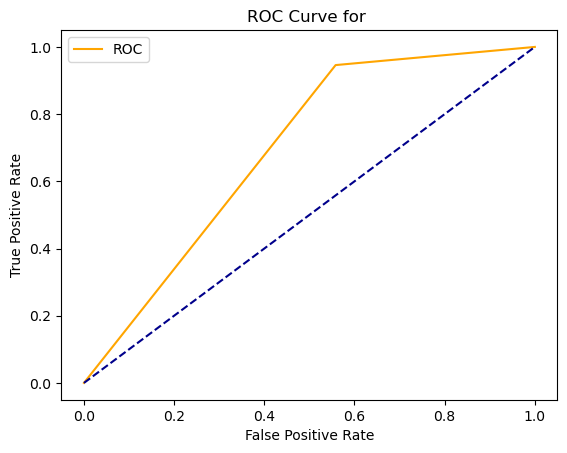

In [949]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### KNeighbors Classifier

In [950]:
from sklearn.neighbors import KNeighborsClassifier

In [951]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [953]:
cls_KN = KNeighborsClassifier(n_neighbors=7, leaf_size=16, p = 1, algorithm='auto', weights = 'uniform')

In [954]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=16, n_neighbors=7, p=1)

In [955]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 0.8043478260869565


In [956]:
y_pred = cls_KN.predict(x_test)

In [957]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8246753246753247


In [958]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  3, 108]], dtype=int64)

In [959]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.82      0.97      0.89       111

    accuracy                           0.82       154
   macro avg       0.84      0.71      0.74       154
weighted avg       0.83      0.82      0.80       154



### Cross-validation

In [960]:
from sklearn.model_selection import KFold, cross_val_score

In [961]:
cross_val_score (cls_KN, x_train, y_train, cv=15)

array([0.77419355, 0.87096774, 0.83870968, 0.77419355, 0.83870968,
       0.83870968, 0.77419355, 0.83870968, 0.70967742, 0.61290323,
       0.83333333, 0.73333333, 0.83333333, 0.76666667, 0.83333333])

In [962]:
cross_val_score (cls_KN, x_train, y_train, cv=5).mean()

0.7934782608695652

In [963]:
cross_val_score (cls_KN, x_test, y_test, cv=15)

array([0.81818182, 0.81818182, 1.        , 1.        , 0.8       ,
       0.8       , 0.7       , 0.8       , 0.7       , 0.9       ,
       0.7       , 0.8       , 0.8       , 0.8       , 1.        ])

In [964]:
cross_val_score (cls_KN, x_test, y_test, cv=5).mean()

0.8313978494623655

### ROC Curve

In [965]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [966]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.97297297 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


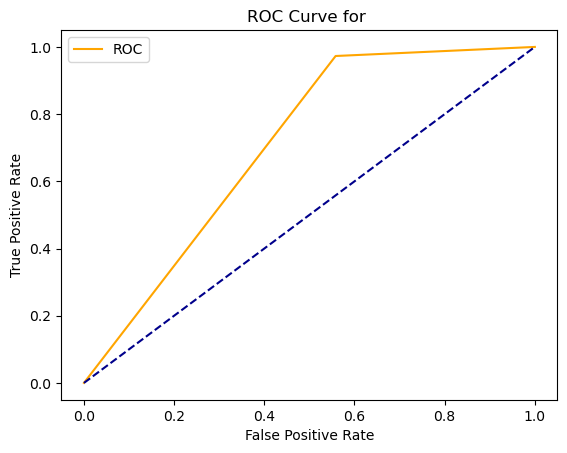

In [967]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to KNeighborsClassifier

In [968]:
from sklearn.ensemble import BaggingClassifier

In [969]:
bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=7, leaf_size=16, p = 1, algorithm='auto', weights = 'uniform'))

In [970]:
bag3.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=16,
                                                      n_neighbors=7, p=1))

In [971]:
print('Accuracy Score:',bag3.score(x_train, y_train))

Accuracy Score: 0.8065217391304348


In [972]:
y_pred = bag3.predict(x_test)

In [973]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8246753246753247


In [974]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  3, 108]], dtype=int64)

In [975]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.82      0.97      0.89       111

    accuracy                           0.82       154
   macro avg       0.84      0.71      0.74       154
weighted avg       0.83      0.82      0.80       154



### Cross-validation

In [976]:
from sklearn.model_selection import KFold, cross_val_score

In [977]:
cross_val_score (bag3, x_train, y_train, cv=5)

array([0.83695652, 0.79347826, 0.81521739, 0.75      , 0.80434783])

In [978]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.7934782608695652

In [979]:
cross_val_score (bag3, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.74193548, 0.80645161, 0.86666667])

In [980]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.791304347826087

### ROC Curve

In [981]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [982]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.97297297 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


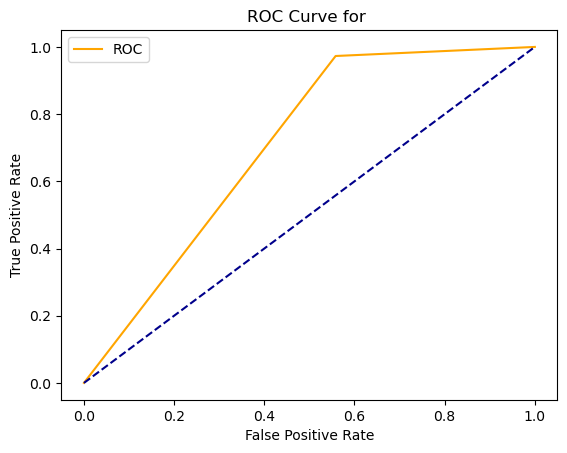

In [983]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Support Vector Classifier

In [984]:
from sklearn.svm import SVC

In [985]:
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10, 100]}
gridsearch = GridSearchCV(estimator=svc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [986]:
cls_SVC = SVC(kernel='linear',C=0.1, gamma=0.1)

In [987]:
cls_SVC.fit(x_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [988]:
print('Accuracy Score:',cls_SVC.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [989]:
y_pred = cls_SVC.predict(x_test)

In [990]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [991]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [992]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [993]:
from sklearn.model_selection import KFold, cross_val_score

In [994]:
cross_val_score (cls_SVC, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.75      , 0.81521739])

In [995]:
cross_val_score (cls_SVC, x_train, y_train, cv=5).mean()

0.8021739130434783

In [996]:
cross_val_score (cls_SVC, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.74193548, 0.80645161, 0.86666667])

In [997]:
cross_val_score (cls_SVC, x_test, y_test, cv=5).mean()

0.8313978494623655

### ROC Curve

In [998]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [999]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


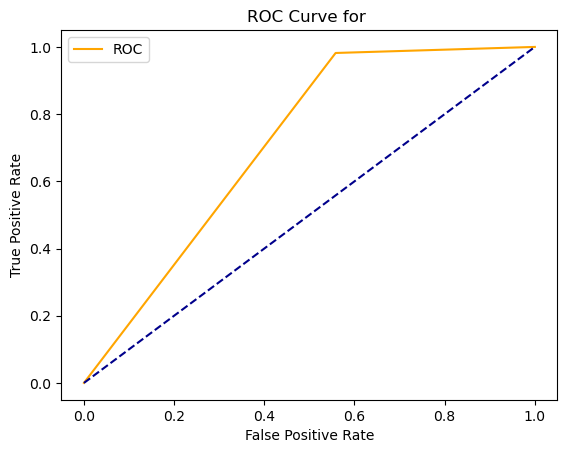

In [1000]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to Support Vector Classifier

In [1001]:
from sklearn.ensemble import BaggingClassifier

In [1002]:
bag4 = BaggingClassifier(SVC(kernel='linear',C=0.1, gamma=0.1))

In [1003]:
bag4.fit(x_train, y_train)

BaggingClassifier(base_estimator=SVC(C=0.1, gamma=0.1, kernel='linear'))

In [1004]:
print('Accuracy Score:',bag4.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [1005]:
y_pred = bag4.predict(x_test)

In [1006]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [1007]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [1008]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [1009]:
from sklearn.model_selection import KFold, cross_val_score

In [1010]:
cross_val_score (bag4, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.75      , 0.81521739])

In [1011]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.8021739130434783

In [1012]:
cross_val_score (bag4, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.74193548, 0.80645161, 0.86666667])

In [1013]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.8021739130434783

### ROC Curve

In [1014]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1015]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


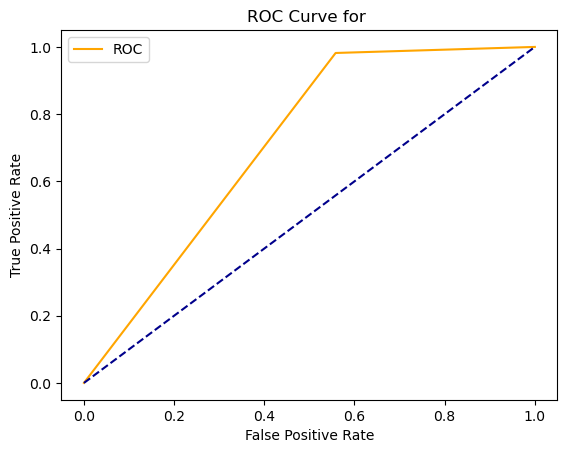

In [1016]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### GradientBoostingClassifier

In [1017]:
from sklearn.ensemble import GradientBoostingClassifier

In [1018]:
cls_gb = GradientBoostingClassifier(n_estimators=15,learning_rate=0.1,max_depth=12)

In [1019]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=12, n_estimators=15)

In [1020]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.8913043478260869


In [1021]:
y_pred = cls_gb.predict(x_test)

In [1022]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7532467532467533


In [1023]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[21, 22],
       [16, 95]], dtype=int64)

In [1024]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53        43
           1       0.81      0.86      0.83       111

    accuracy                           0.75       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.74      0.75      0.75       154



### Cross-validation

In [1025]:
from sklearn.model_selection import KFold, cross_val_score

In [1026]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.79347826, 0.77173913, 0.75      , 0.67391304, 0.77173913])

In [1027]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.75

In [1028]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.80645161, 0.83870968, 0.70967742, 0.80645161, 0.83333333])

In [1029]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.7521739130434782

### ROC Curve

In [1030]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1031]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85585586 1.        ]
False Positive rate =  [0.         0.51162791 1.        ]


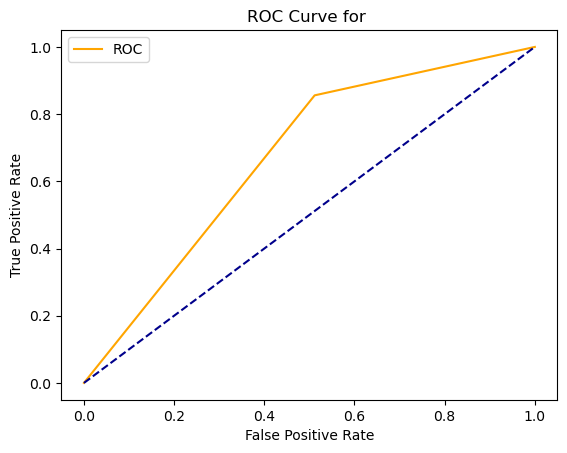

In [1032]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GradientBoostingClassifier

In [1033]:
from sklearn.ensemble import BaggingClassifier

In [1034]:
bag5 = BaggingClassifier(GradientBoostingClassifier(n_estimators=15,learning_rate=0.1,max_depth=12))

In [1035]:
bag5.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(max_depth=12,
                                                            n_estimators=15))

In [1036]:
print('Accuracy Score:',bag5.score(x_train, y_train))

Accuracy Score: 0.8652173913043478


In [1037]:
y_pred = bag5.predict(x_test)

In [1038]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8181818181818182


In [1039]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 22,  21],
       [  7, 104]], dtype=int64)

In [1040]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.51      0.61        43
           1       0.83      0.94      0.88       111

    accuracy                           0.82       154
   macro avg       0.80      0.72      0.75       154
weighted avg       0.81      0.82      0.81       154



### Cross-validation

In [1041]:
from sklearn.model_selection import KFold, cross_val_score

In [1042]:
cross_val_score (bag5, x_train, y_train, cv=5)

array([0.75      , 0.7826087 , 0.7826087 , 0.66304348, 0.76086957])

In [1043]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.7652173913043478

In [1044]:
cross_val_score (bag5, x_test, y_test, cv=5)

array([0.80645161, 0.83870968, 0.70967742, 0.80645161, 0.83333333])

In [1045]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.75

### ROC Curve

In [1046]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1047]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.93693694 1.        ]
False Positive rate =  [0.         0.48837209 1.        ]


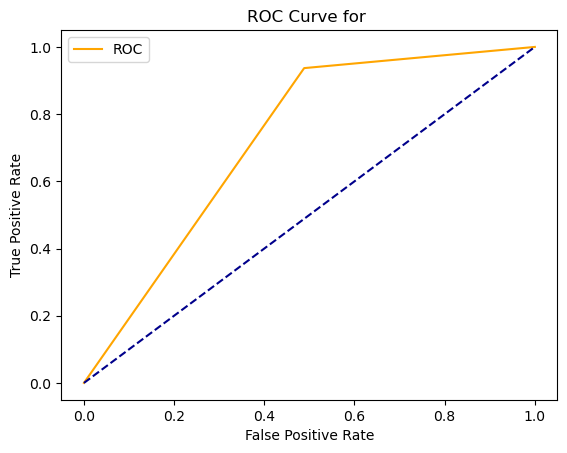

In [1048]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### GaussianNB

In [1049]:
from sklearn.naive_bayes import GaussianNB

In [1050]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-09}

In [1051]:
gnb = GaussianNB(var_smoothing=1e-09)

In [1052]:
gnb.fit(x_train, y_train)

GaussianNB()

In [1053]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [1054]:
y_pred = gnb.predict(x_test)

In [1055]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [1056]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [1057]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [1058]:
from sklearn.model_selection import KFold, cross_val_score

In [1059]:
cross_val_score (gnb, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.75      , 0.81521739])

In [1060]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.8021739130434783

In [1061]:
cross_val_score (gnb, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.74193548, 0.80645161, 0.86666667])

In [1062]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.8021739130434783

### ROC Curve

In [1063]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1064]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


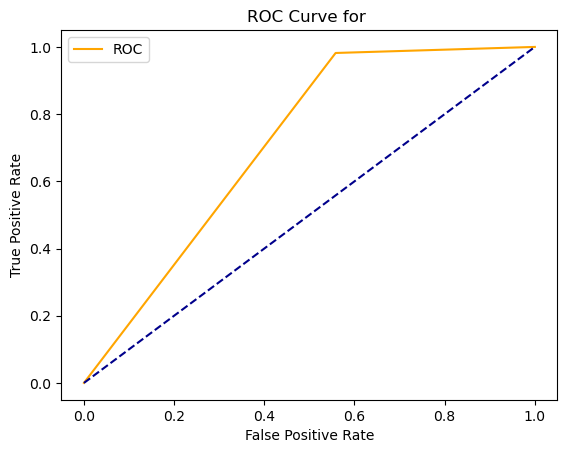

In [1065]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GaussianNB

In [1066]:
from sklearn.ensemble import BaggingClassifier

In [1067]:
bag6 = BaggingClassifier(GaussianNB(var_smoothing=1e-09))

In [1068]:
bag6.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [1069]:
print('Accuracy Score:',bag6.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [1070]:
y_pred = bag6.predict(x_test)

In [1071]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [1072]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [1073]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [1074]:
from sklearn.model_selection import KFold, cross_val_score

In [1075]:
cross_val_score (bag6, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.75      , 0.81521739])

In [1076]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.8021739130434783

In [1077]:
cross_val_score (bag6, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.70967742, 0.80645161, 0.86666667])

In [1078]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.8021739130434783

### ROC Curve

In [1079]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1080]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


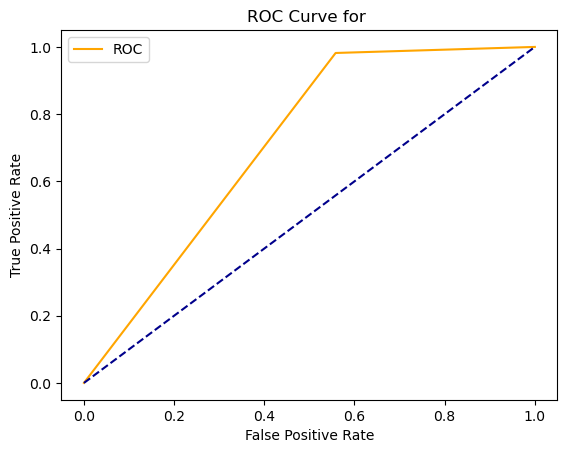

In [1081]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Best Model

### Applying BaggingClassifier to RandomForestClassifier

In [934]:
from sklearn.ensemble import BaggingClassifier

In [935]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=25,max_features='sqrt',min_samples_split=5,max_depth=25))

In [936]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=25,
                                                        max_features='sqrt',
                                                        min_samples_split=5,
                                                        n_estimators=25))

In [937]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.8260869565217391


In [938]:
y_pred = bag2.predict(x_test)

In [939]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8051948051948052


In [940]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  6, 105]], dtype=int64)

In [941]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56        43
           1       0.81      0.95      0.88       111

    accuracy                           0.81       154
   macro avg       0.79      0.69      0.72       154
weighted avg       0.80      0.81      0.79       154



##### Very low difference between testing score & training score

# 

### Saving the Best Model

In [ ]:
import pickle

In [ ]:
with open('mrf', 'wb') as f: 
    pickle.dump(bag2, f)

# 

# 